### Data Analytics Capstone: COPD
May 9, 2022

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #viz
import matplotlib.pyplot as plt #viz
%matplotlib inline
sns.set(color_codes=True)

In [2]:
df = pd.read_csv('https://chronicdata.cdc.gov/api/views/aqr6-8kj8/rows.csv')

In [3]:
# Examining the data

In [4]:
df.shape

(142704, 33)

In [5]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2015,AK,Alaska,NVSS,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,NaN,"cases per 100,000",Age-adjusted Rate,...,2,COPD,COPD1_2,AGEADJRATE,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2015,2015,AK,Alaska,CMS Part A Claims Data,Chronic Obstructive Pulmonary Disease,Hospitalization for chronic obstructive pulmon...,NaN,"cases per 1,000",Age-adjusted Rate,...,2,COPD,COPD5_4,AGEADJRATE,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2011,2011,AL,Alabama,NVSS,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,NaN,"cases per 100,000",Crude Rate,...,1,COPD,COPD1_1,CRDRATE,RACE,WHT,NaN,NaN,NaN,NaN
3,2017,2017,AL,Alabama,SEDD; SID,Chronic Obstructive Pulmonary Disease,Emergency department visit rate for chronic ob...,NaN,NaN,Number,...,1,COPD,COPD6_2,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2017,2017,AR,Arkansas,NVSS,Chronic Obstructive Pulmonary Disease,Mortality with chronic obstructive pulmonary d...,NaN,"cases per 100,000",Crude Rate,...,5,COPD,COPD1_1,CRDRATE,GENDER,GENM,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
142699,2020,2020,VT,Vermont,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of chronic obstructive pulmonary di...,NaN,%,Age-adjusted Prevalence,...,50,COPD,COPD2_0_1,AGEADJPREV,RACE,HIS,NaN,NaN,NaN,NaN
142700,2020,2020,VT,Vermont,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of current smoking among adults >= ...,NaN,%,Crude Prevalence,...,50,COPD,COPD3_0,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
142701,2020,2020,WI,Wisconsin,BRFSS,Chronic Obstructive Pulmonary Disease,Pneumococcal vaccination among noninstitutiona...,NaN,%,Age-adjusted Prevalence,...,55,COPD,COPD8_0,AGEADJPREV,RACE,HIS,NaN,NaN,NaN,NaN
142702,2020,2020,WV,West Virginia,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of current smoking among adults >= ...,NaN,%,Age-adjusted Prevalence,...,54,COPD,COPD3_0_1,AGEADJPREV,RACE,WHT,NaN,NaN,NaN,NaN
142703,2020,2020,WY,Wyoming,BRFSS,Chronic Obstructive Pulmonary Disease,Influenza vaccination among noninstitutionaliz...,NaN,%,Crude Prevalence,...,56,COPD,COPD7_0,CRDPREV,RACE,WHT,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142704 entries, 0 to 142703
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  142704 non-null  int64  
 1   YearEnd                    142704 non-null  int64  
 2   LocationAbbr               142704 non-null  object 
 3   LocationDesc               142704 non-null  object 
 4   DataSource                 142704 non-null  object 
 5   Topic                      142704 non-null  object 
 6   Question                   142704 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              116834 non-null  object 
 9   DataValueType              142704 non-null  object 
 10  DataValue                  87646 non-null   float64
 11  DataValueAlt               87646 non-null   float64
 12  DataValueFootnoteSymbol    57255 non-null   object 
 13  DatavalueFootnote          57

In [8]:
# Columns are in proper format for use. Dropping the columns that will not be used.

In [9]:
drop_cols1=['YearEnd','LocationDesc','Topic','Response','DataValueAlt','DataValueFootnoteSymbol',
            'DatavalueFootnote','LowConfidenceLimit','HighConfidenceLimit',
            'StratificationCategory2','Stratification2',
            'StratificationCategory3','Stratification3','ResponseID','LocationID',
            'TopicID','QuestionID','StratificationCategoryID2','StratificationID2',
            'StratificationCategoryID3','StratificationID3']

In [10]:
df.drop(drop_cols1,inplace=True,axis=1)

In [11]:
# Looking for null values
# 
print(df.isnull().sum())

YearStart                        0
LocationAbbr                     0
DataSource                       0
Question                         0
DataValueUnit                25870
DataValueType                    0
DataValue                    55058
StratificationCategory1          0
Stratification1                  0
DataValueTypeID                  0
StratificationCategoryID1        0
StratificationID1                0
dtype: int64


In [12]:
# Drop null values
# 
df.dropna(inplace = True)

In [13]:
print(df.isnull().sum())

YearStart                    0
LocationAbbr                 0
DataSource                   0
Question                     0
DataValueUnit                0
DataValueType                0
DataValue                    0
StratificationCategory1      0
Stratification1              0
DataValueTypeID              0
StratificationCategoryID1    0
StratificationID1            0
dtype: int64


In [14]:
# Looking for duplicate rows; there aren't any
# 
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ",duplicate_rows_df.shape)

number of duplicate rows:  (0, 12)


In [15]:
# Select columns I want to use
# 
df = df[['DataSource','DataValueType','Question','StratificationCategory1','Stratification1','YearStart','DataValue','DataValueUnit','LocationAbbr']]

In [16]:
# The dataset contains data from 4 sources:
# 
df['DataSource'].value_counts()

BRFSS                     36517
CMS Part A Claims Data    13900
NVSS                      12619
SEDD; SID                  8184
Name: DataSource, dtype: int64

In [17]:
# BRFSS (Behavioral Risk Factor Surveillance System) examines health-related
# risk behaviors, chronic health conditions,and the use of preventative services
# 
# Data values are expressed as percentages
# 
df1 = df[df['DataSource'] == ('BRFSS')]

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36517 entries, 79680 to 142703
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DataSource               36517 non-null  object 
 1   DataValueType            36517 non-null  object 
 2   Question                 36517 non-null  object 
 3   StratificationCategory1  36517 non-null  object 
 4   Stratification1          36517 non-null  object 
 5   YearStart                36517 non-null  int64  
 6   DataValue                36517 non-null  float64
 7   DataValueUnit            36517 non-null  object 
 8   LocationAbbr             36517 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.8+ MB


In [19]:
# Rename fields

In [20]:
df1 = df.rename(columns={'YearStart':'Year','StratificationCategory1':'Category', 
                         'Stratification1':'Subcategory', 'DataValueType':'ValueType',
                        'DataSource':'Source', 'DataValue':'Percentage', 
                         'LocationAbbr':'Location'})

In [21]:
# df1a : I'll use the age-adjusted prevalence data

In [22]:
df1a = df1[df1['ValueType'] == 'Age-adjusted Prevalence']
df1a.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79683,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2015,40.5,%,AK
79690,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Race/Ethnicity,"White, non-Hispanic",2015,39.8,%,AK
79691,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2018,45.1,%,AK
79694,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2011,63.0,%,AK
79699,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2014,48.0,%,AK


In [23]:
df1a['Question'].value_counts()

Prevalence of chronic obstructive pulmonary disease among adults >= 18                                                    3191
Prevalence of chronic obstructive pulmonary disease among adults >= 45 years                                              3039
Prevalence of current smoking among adults >= 18 with diagnosed chronic obstructive pulmonary disease                     2424
Influenza vaccination among noninstitutionalized adults aged >= 45 years with chronic obstructive pulmonary disease       2392
Pneumococcal vaccination among noninstitutionalized adults aged >= 45 years with chronic obstructive pulmonary disease    2376
Prevalence of current smoking among adults >= 45 years with diagnosed chronic obstructive pulmonary disease               2332
Prevalence of activity limitation among adults >= 18 with diagnosed chronic obstructive pulmonary disease                 1341
Prevalence of activity limitation among adults >= 45 years with diagnosed chronic obstructive pulmonary disease

In [24]:
# df1a1: Age-adjusted prevalence of chronic obstructive pulmonary disease among adults
#        >= 18 years - overall, by gender, by race/ethnicity
# 
# Data - 1 record per year (2011-2020) per location (50 states and 3 territories:PR, USVI, 
# Guam)

In [25]:
df1a1 = df1a[df1a['Question']==('Prevalence of chronic obstructive pulmonary disease among adults >= 18')]

In [26]:
# AGE_ADJUSTED PREVALENCE OF COPD - 2 age categories:
# Q1 >=18  
# Q2 >=45  

In [27]:
# Examining COPD prevalence by gender relative to the >= 18 years age category 
dfQ1G = df1a1[(df1a1['Category']=='Gender')]
dfQ1G.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79704,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Male,2018,5.1,%,AK
79723,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2012,6.0,%,AK
79734,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Male,2011,6.8,%,AK
79740,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Male,2016,5.5,%,AK
79757,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2014,6.0,%,AK


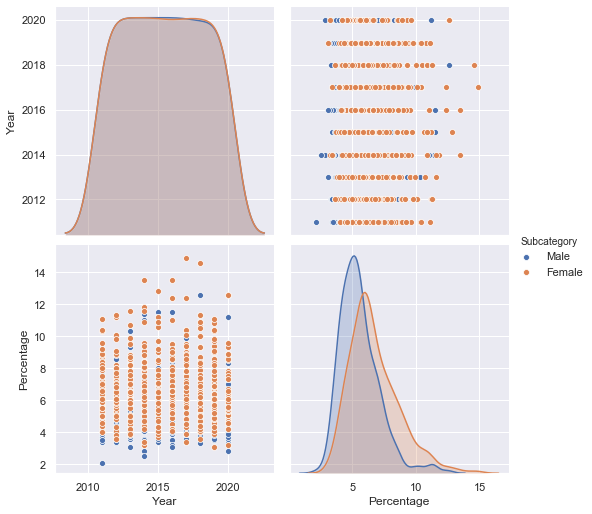

In [28]:
# Pairplot clearly shows a higher incidence of COPD in women >=18
# 
sns.pairplot(dfQ1G,hue="Subcategory",height=3.5)

In [29]:
# Examining data for males >=18 with diagnosed COPD
dfQ1M = df1a1[(df1a1['Category']=='Gender') & (df1a1['Subcategory'] == 'Male')]
dfQ1M.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79704,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Male,2018,5.1,%,AK
79734,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Male,2011,6.8,%,AK
79740,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Male,2016,5.5,%,AK
79783,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Male,2013,4.6,%,AK
80193,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Male,2012,4.6,%,AK


In [30]:
dfQ1M.groupby('Year').describe()

Percentage                                                   
          count      mean       std  min    25%   50%    75%   max
Year                                                              
2011       54.0  5.320370  1.267501  2.1  4.500  5.25  6.075   8.6
2012       54.0  5.555556  1.356559  3.3  4.600  5.60  6.175  10.1
2013       54.0  5.637037  1.490637  3.1  4.600  5.30  6.500  10.3
2014       54.0  5.524074  1.692707  2.5  4.500  5.35  6.350  11.4
2015       54.0  5.494444  1.646427  3.4  4.300  5.15  6.075  11.5
2016       54.0  5.577778  1.600550  3.1  4.300  5.50  6.275  11.5
2017       54.0  5.633333  1.728998  3.4  4.375  5.40  6.175  12.4
2018       53.0  5.867925  1.738343  3.3  4.800  5.60  6.600  12.6
2019       53.0  5.652830  1.607866  3.5  4.300  5.20  7.000  10.4
2020       54.0  5.433333  1.586500  2.8  4.225  5.20  6.500  11.2

(<matplotlib.axes._subplots.AxesSubplot at 0xe07d6b0>,
 Text(0.5, 1.0, 'Prevalence of COPD among Males >=18 years old'))

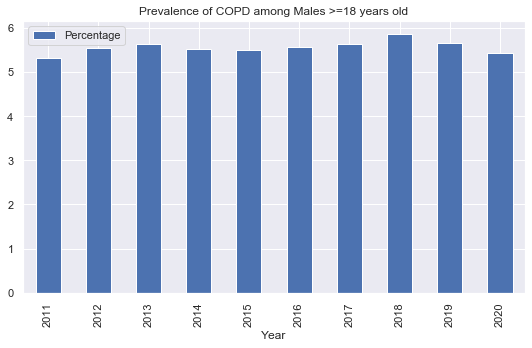

In [31]:
dfQ1M.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title("Prevalence of COPD among Males >=18 years old")

In [32]:
# Examining data for females >=18 with diagnosed COPD
# 
dfQ1F = df1a1[(df1a1['Category']=='Gender') & (df1a1['Subcategory'] == 'Female')]
dfQ1F.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79723,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2012,6.0,%,AK
79757,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2014,6.0,%,AK
79791,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2018,6.2,%,AK
79823,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2016,6.6,%,AK
80785,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2013,6.7,%,AK


In [33]:
dfQ1F.groupby('Year').describe()

Percentage                                                   
          count      mean       std  min    25%   50%    75%   max
Year                                                              
2011       54.0  6.661111  1.749438  4.0  5.350  6.50  8.000  11.1
2012       54.0  6.575926  1.741170  3.6  5.525  6.10  7.650  11.3
2013       54.0  6.737037  1.709937  3.8  5.650  6.45  7.575  11.6
2014       54.0  6.807407  2.061402  3.2  5.700  6.45  7.800  13.5
2015       54.0  6.550000  1.989382  3.7  5.325  6.10  7.575  12.8
2016       53.0  6.898113  1.954137  4.1  5.600  6.60  7.900  13.5
2017       54.0  6.898148  2.175983  3.4  5.600  6.55  7.800  14.9
2018       54.0  6.946296  2.253527  3.6  5.100  6.50  8.275  14.6
2019       53.0  6.700000  1.937087  3.1  5.200  6.30  7.800  11.1
2020       54.0  6.390741  1.943083  3.2  5.125  5.90  7.300  12.6

(<matplotlib.axes._subplots.AxesSubplot at 0xe0d9330>,
 Text(0.5, 1.0, 'Prevalence of COPD among Females >=18 years old'))

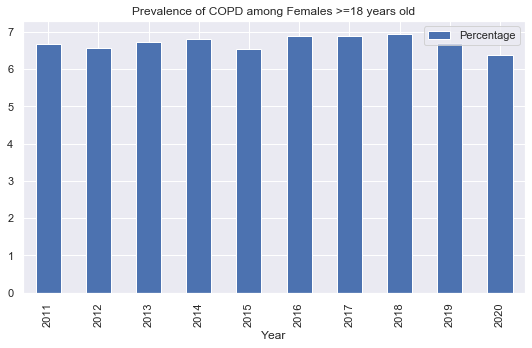

In [34]:
dfQ1F.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title("Prevalence of COPD among Females >=18 years old")

In [35]:
# Examining COPD prevalence by gender in the >=18 years age category in New York Stata
dfQ1NYG = df1a1[(df1a1['Category']=='Gender') & (df1a1['Location'] == 'NY')]
dfQ1NYG.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
116302,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2014,5.8,%,NY
116319,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2012,5.7,%,NY
116350,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2017,4.9,%,NY
116401,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Male,2015,4.8,%,NY
116476,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2019,6.2,%,NY


In [36]:
dfQ1NYG = df1a1[(df1a1['Category']=='Gender') & (df1a1['Location'] == 'NY')]
dfQ1NYG.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
116302,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2014,5.8,%,NY
116319,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2012,5.7,%,NY
116350,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2017,4.9,%,NY
116401,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Male,2015,4.8,%,NY
116476,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2019,6.2,%,NY


In [37]:
dfQ1NYG.groupby(['Subcategory','Year'])

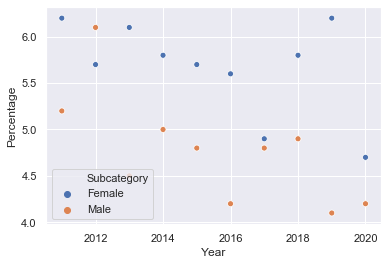

In [38]:
sns.scatterplot(data=dfQ1NYG,x="Year",y="Percentage",hue="Subcategory")
plt.show()

In [39]:
# Overall prevalence of COPD >=18 years old
dfQ1O = df1a1[df1a1['Category']=='Overall']
dfQ1O.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79756,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Overall,Overall,2014,4.3,%,AK
79830,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Overall,Overall,2012,5.3,%,AK
79954,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Overall,Overall,2018,5.8,%,AK
79973,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Overall,Overall,2016,6.0,%,AK
80876,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Overall,Overall,2013,5.6,%,AK


In [40]:
dfQ1O.groupby('Year').describe()

Percentage                                                   
          count      mean       std  min    25%   50%    75%   max
Year                                                              
2011       54.0  6.009259  1.451774  3.1  4.925  5.85  7.075   9.5
2012       54.0  6.075926  1.492615  3.4  5.200  5.80  6.975  10.7
2013       54.0  6.194444  1.524444  3.7  5.150  6.00  6.975  10.4
2014       54.0  6.187037  1.842890  3.3  5.200  6.00  7.100  12.3
2015       54.0  6.031481  1.772412  3.6  5.000  5.75  6.875  12.0
2016       55.0  6.176364  1.786468  3.2  5.000  5.80  6.950  12.5
2017       54.0  6.277778  1.912488  3.3  4.950  5.90  7.175  13.7
2018       54.0  6.431481  1.938958  3.6  5.125  6.10  7.375  13.6
2019       53.0  6.196226  1.729602  3.4  4.900  5.90  7.300  10.7
2020       54.0  5.924074  1.727353  3.2  4.700  5.55  6.800  11.9

(<matplotlib.axes._subplots.AxesSubplot at 0xe16fbb0>,
 Text(0.5, 1.0, 'Overall Prevalence of COPD among adults >=18 years old'))

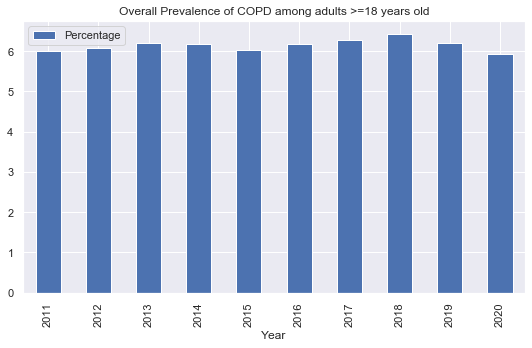

In [41]:
dfQ1O.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title("Overall Prevalence of COPD among adults >=18 years old")

In [42]:
# Overall COPD Prevalence in the >=18 years age category in New York
dfQ1NYO = df1a1[(df1a1['Category']=='Overall') & (df1a1['Location'] == 'NY')]
dfQ1NYO.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
116194,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Overall,Overall,2019,5.2,%,NY
116216,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Overall,Overall,2017,4.9,%,NY
116467,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Overall,Overall,2014,5.4,%,NY
116563,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Overall,Overall,2012,5.9,%,NY
117173,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Overall,Overall,2011,5.7,%,NY


(<matplotlib.axes._subplots.AxesSubplot at 0xe19e230>,
 Text(0.5, 1.0, 'Overall Prevalence of COPD among adults >=18 years old in New York'))

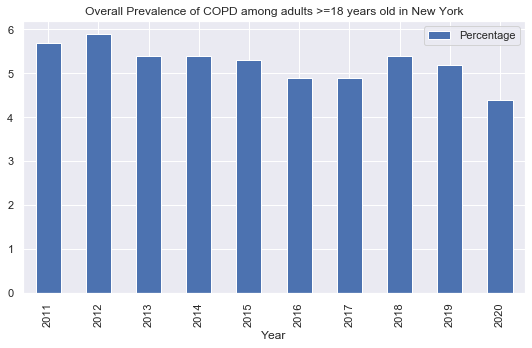

In [43]:
dfQ1NYO.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title("Overall Prevalence of COPD among adults >=18 years old in New York")

In [44]:
# COPD Prevalence in adults >=18 by Race/Ethnicity
dfQ1RE = df1a1[df1a1['Category']== 'Race/Ethnicity']
dfQ1RE.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
80033,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Race/Ethnicity,"Other, non-Hispanic",2017,11.4,%,AK
80258,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Race/Ethnicity,"White, non-Hispanic",2017,4.4,%,AK
80277,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Race/Ethnicity,"White, non-Hispanic",2019,4.8,%,AK
80287,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Race/Ethnicity,"Multiracial, non-Hispanic",2011,14.1,%,AK
80294,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Race/Ethnicity,"White, non-Hispanic",2015,3.9,%,AK


In [45]:
# Examining prevalence of COPD in adults >=18 by race/ethnicity
dfQ1RE.groupby(['Subcategory','Year']).describe().round(2)

Percentage                                  \
                                    count   mean   std  min    25%    50%   
Subcategory               Year                                              
Black, non-Hispanic       2011       32.0   6.61  2.04  3.8   5.30   6.10   
                          2012       35.0   6.77  1.41  3.6   5.90   6.70   
                          2013       29.0   6.90  1.25  4.9   6.10   6.80   
                          2014       34.0   6.91  1.79  3.8   5.50   6.95   
                          2015       31.0   6.25  1.63  3.0   5.35   6.10   
                          2016       32.0   7.01  2.65  0.0   5.35   7.25   
                          2017       33.0   7.54  2.52  4.7   5.80   7.20   
                          2018       32.0   7.39  3.19  3.6   5.68   6.95   
                          2019       33.0   6.90  1.77  3.5   5.70   6.80   
                          2020       33.0   6.05  2.14  0.0   4.60   6.00   
Hispanic                  2011       22.0   4.79  1.82  0.0   3.87   4.65   
                          2012       21.0   4.69  1.28  3.0   3.80   4.50   
                          2013       22.0   4.61  1.76  0.0   3.73   4.55   
                          2014       22.0   3.98  1.72  0.0   3.73   4.10   
                          2015       17.0   3.88  1.12  2.7   3.10   3.70   
                          2016       23.0   4.50  1.64  2.4   3.25   4.40   
                          2017       22.0   4.22  1.39  2.5   3.40   3.80   
                          2018       26.0   4.81  2.37  2.7   3.62   4.10   
                          2019       25.0   4.62  1.87  2.1   3.60   4.20   
                          2020       20.0   4.40  1.66  2.6   3.55   3.85   
Multiracial, non-Hispanic 2011       25.0  13.59  3.59  5.7  12.00  13.00   
                          2012       31.0  13.90  4.34  4.4  11.15  13.20   
                          2013       22.0  13.22  3.87  5.3  11.12  12.85   
                          2014       26.0  12.73  4.37  4.9   9.62  12.20   
                          2015       20.0  12.57  4.90  5.0   9.50  12.05   
                          2016       28.0  15.27  6.71  5.8   9.00  14.10   
                          2017       26.0  13.87  3.84  5.7  10.68  14.40   
                          2018       24.0  12.76  4.70  4.0   9.55  12.10   
                          2019       23.0  13.89  5.81  5.4   9.45  12.10   
                          2020       18.0  12.59  7.42  4.4   7.07  10.80   
Other, non-Hispanic       2011       25.0   8.09  3.79  2.4   5.60   7.10   
                          2012       28.0   7.81  4.56  2.4   4.03   6.50   
                          2013       28.0   7.56  4.50  2.3   4.72   6.20   
                          2014       29.0   7.19  4.37  1.8   4.20   7.20   
                          2015       26.0   7.94  4.80  1.9   4.08   6.75   
                          2016       26.0   7.18  4.27  1.2   3.55   6.65   
                          2017       26.0   8.74  5.64  2.1   4.82   7.65   
                          2018       33.0   7.40  3.71  2.5   4.10   7.50   
                          2019       34.0   8.70  5.36  2.3   3.95   7.90   
                          2020       23.0   6.72  3.41  2.0   3.75   7.10   
White, non-Hispanic       2011       51.0   6.16  1.55  2.4   4.85   5.90   
                          2012       51.0   6.11  1.63  1.8   5.05   5.70   
                          2013       51.0   6.27  1.62  3.9   5.05   6.20   
                          2014       51.0   6.40  2.00  2.2   5.20   6.10   
                          2015       51.0   6.32  1.85  3.0   5.00   6.10   
                          2016       52.0   6.14  2.00  0.0   5.00   6.10   
                          2017       51.0   6.43  2.08  2.8   5.15   5.90   
                          2018       51.0   6.49  2.08  2.4   4.90   6.20   
                          2019       50.0   6.34  1.85  1.6   5.00   5.90   
                          2

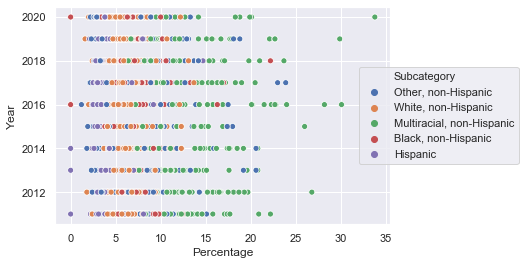

In [46]:
# Multiracial, non Hispanic individuals have a much higher incidence of COPD; Hispanic 
# individuals have the lowest incidence
g = sns.scatterplot(data=dfQ1RE,x="Percentage",y="Year",hue="Subcategory")
g.legend(loc='right',bbox_to_anchor=(1.40,0.5),ncol=1)
plt.show()

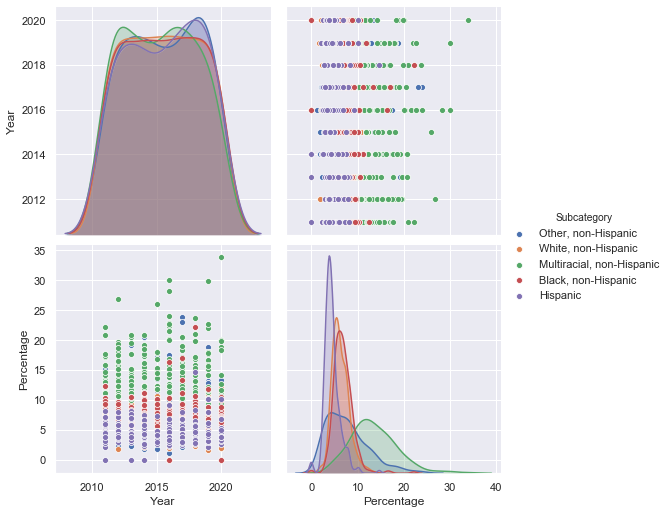

In [47]:
sns.pairplot(dfQ1RE,hue="Subcategory",height=3.5)

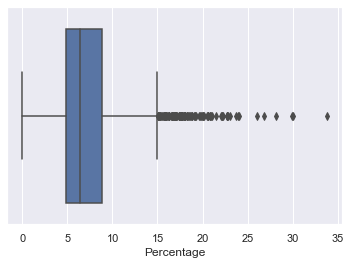

In [48]:
#Wide range of values for race/ethnicity
sns.boxplot(x=dfQ1RE['Percentage'])

In [49]:
# df1a2: Age-adjusted prevalence of chronic obstructive pulmonary disease among adults
#        >= 45 years - overall, by gender, by race/ethnicity                                            

In [50]:
df1a2 = df1a[df1a['Question']==('Prevalence of chronic obstructive pulmonary disease among adults >= 45 years')]

In [51]:
# Examining incidence of COPD in adults >= 45 by gender
dfQ2G = df1a1[(df1a1['Category']=='Gender')]
dfQ2G.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79704,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Male,2018,5.1,%,AK
79723,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2012,6.0,%,AK
79734,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Male,2011,6.8,%,AK
79740,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Male,2016,5.5,%,AK
79757,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2014,6.0,%,AK


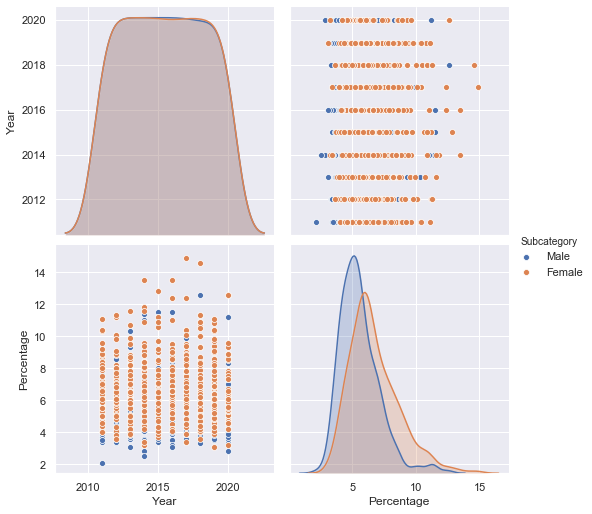

In [52]:
# Pairplot clearly shows a higher incidence of COPD in women >=45 years old
# 
sns.pairplot(dfQ2G,hue="Subcategory",height=3.5)

In [53]:
# Examining prevalence of COPD in men >= 45
# 
dfQ2M = df1a2[(df1a2['Category']=='Gender') & (df1a2['Subcategory'] == 'Male')]
dfQ2M.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79705,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Male,2011,10.7,%,AK
79721,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Male,2013,7.3,%,AK
79769,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Male,2017,7.0,%,AK
79833,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Male,2014,5.5,%,AK
79895,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Male,2015,6.4,%,AK


In [54]:
dfQ2M.groupby('Year').describe()

Percentage                                                    
          count      mean       std  min    25%   50%     75%   max
Year                                                               
2011       53.0  8.226415  1.949571  2.7  7.100  8.20   9.600  12.5
2012       54.0  8.518519  2.256402  4.2  7.300  8.45   9.700  15.0
2013       54.0  8.546296  2.106030  4.3  7.125  8.05   9.950  14.6
2014       54.0  8.596296  2.559183  3.6  7.125  8.40   9.275  16.7
2015       53.0  8.603774  2.442411  4.0  7.100  8.20  10.000  16.6
2016       53.0  8.739623  2.427989  5.0  7.100  8.10   9.900  17.3
2017       54.0  9.024074  2.612881  4.9  7.000  8.60  10.000  17.7
2018       53.0  9.324528  2.571135  4.7  7.700  9.00  10.100  18.4
2019       53.0  9.013208  2.719802  4.8  7.100  8.40  11.000  16.8
2020       54.0  8.716667  2.585646  3.6  6.925  8.45   9.775  17.4

(<matplotlib.axes._subplots.AxesSubplot at 0xd6e56f0>,
 Text(0.5, 1.0, 'Prevalence of COPD among Males >=45 years old'))

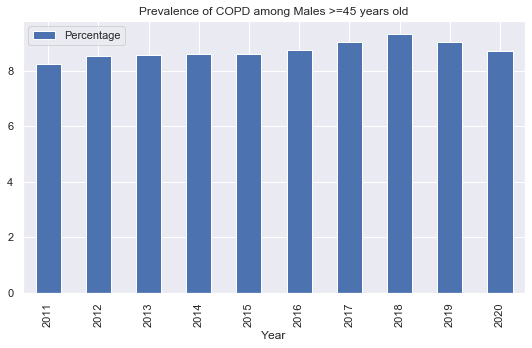

In [55]:
dfQ2M.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title("Prevalence of COPD among Males >=45 years old")

In [56]:
# Examining prevalence of COPD in women >= 45
# 
dfQ2F = df1a2[(df1a2['Category']=='Gender') & (df1a2['Subcategory'] == 'Female')]
dfQ2F.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79784,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2014,9.3,%,AK
79857,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2017,7.4,%,AK
79910,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2019,8.2,%,AK
79984,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2011,8.2,%,AK
79992,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2015,6.5,%,AK


In [57]:
dfQ2F.groupby('Year').describe()

Percentage                                                      
          count       mean       std  min    25%    50%     75%   max
Year                                                                 
2011       54.0   9.957407  2.583810  4.5  8.000   9.75  11.775  15.3
2012       54.0   9.942593  2.418685  4.7  8.525   9.50  11.475  16.3
2013       54.0  10.088889  2.499786  5.3  8.400   9.65  11.675  16.1
2014       54.0  10.111111  3.002682  3.5  8.350   9.70  11.400  19.8
2015       54.0  10.138889  3.151365  3.9  8.250   9.80  11.800  20.2
2016       53.0  10.349057  2.794681  5.9  8.500   9.70  12.300  20.7
2017       54.0  10.418519  3.071664  4.4  8.600   9.90  12.100  20.5
2018       54.0  10.861111  3.398080  5.9  8.475  10.20  12.700  23.0
2019       53.0  10.369811  2.826971  5.5  8.400   9.80  12.200  17.5
2020       53.0  10.111321  2.998632  4.8  8.200   9.20  11.500  19.3

(<matplotlib.axes._subplots.AxesSubplot at 0xf0adcf0>,
 Text(0.5, 1.0, 'Prevalence of COPD among Females >=45 years old'))

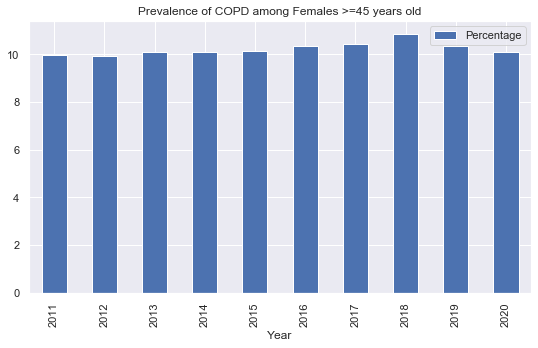

In [58]:
dfQ2F.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title("Prevalence of COPD among Females >=45 years old")

In [59]:
# Prevalence of COPD by Gender for adults >=45 in New York State
dfQ2NYG = df1a2[(df1a2['Category']=='Gender') & (df1a2['Location'] == 'NY')]
dfQ2NYG.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
116130,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2014,8.8,%,NY
116226,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2016,8.7,%,NY
116297,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2018,8.7,%,NY
116458,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2012,9.1,%,NY
116762,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Gender,Female,2011,9.1,%,NY


In [60]:
dfQ2NYG.groupby(['Year','Subcategory'])

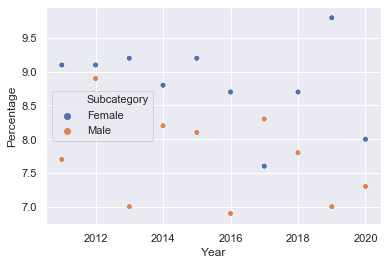

In [61]:
sns.scatterplot(data=dfQ2NYG,x="Year",y="Percentage",hue="Subcategory")
plt.show()

In [62]:
# Overall COPD prevalence in adults >=45 years old
dfQ2O = df1a2[df1a2['Category']=='Overall']
dfQ2O.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79780,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Overall,Overall,2013,8.4,%,AK
79927,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Overall,Overall,2011,9.3,%,AK
80259,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Overall,Overall,2015,6.5,%,AK
80374,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Overall,Overall,2019,8.2,%,AK
80538,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Overall,Overall,2017,7.2,%,AK


In [63]:
dfQ2O.groupby('Year').describe()

Percentage                                                     
          count       mean       std  min    25%   50%     75%   max
Year                                                                
2011       54.0   9.072222  2.245198  3.6  7.350  8.85  10.800  13.7
2012       54.0   9.251852  2.213146  4.6  7.850  9.00  10.425  15.5
2013       54.0   9.340741  2.194205  5.0  7.900  8.90  10.300  14.7
2014       54.0   9.377778  2.724637  3.5  8.025  8.90  10.375  18.2
2015       54.0   9.350000  2.721317  4.7  7.925  8.90  10.750  17.8
2016       55.0   9.400000  2.697461  2.8  7.800  8.80  11.000  19.0
2017       54.0   9.731481  2.771610  5.1  7.900  9.30  11.100  19.1
2018       54.0  10.070370  2.923724  5.3  8.325  9.70  11.250  20.7
2019       53.0   9.696226  2.701208  5.2  7.900  8.80  11.600  16.8
2020       54.0   9.411111  2.708175  5.3  7.625  8.90  10.950  18.4

(<matplotlib.axes._subplots.AxesSubplot at 0xf0fd070>,
 Text(0.5, 1.0, 'Overall Prevalence of COPD among adults >=45 years old'))

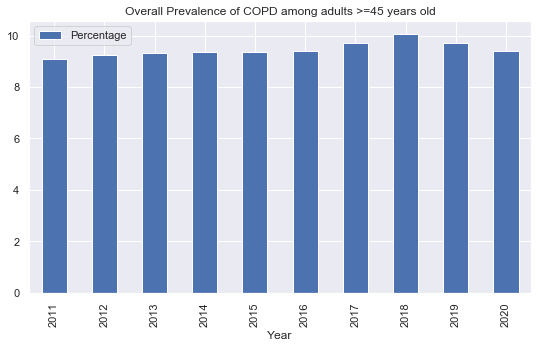

In [64]:
dfQ2O.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title("Overall Prevalence of COPD among adults >=45 years old")

In [65]:
# Overall prevalence of COPD in adults >=45 in New York
# NY Overall; below national average; actually declined in New York
# 
dfQ2NYO = df1a2[(df1a2['Category']=='Overall') & (df1a2['Location'] == 'NY')]
dfQ2NYO.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
115996,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Overall,Overall,2012,9.2,%,NY
116303,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Overall,Overall,2013,8.2,%,NY
116323,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Overall,Overall,2018,8.3,%,NY
116338,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Overall,Overall,2016,7.9,%,NY
116863,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Overall,Overall,2014,8.6,%,NY


(<matplotlib.axes._subplots.AxesSubplot at 0xf15d650>,
 Text(0.5, 1.0, 'Overall Prevalence of COPD among adults >=45 years old in New York'))

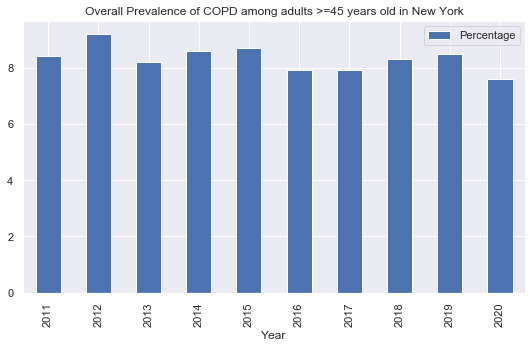

In [66]:
dfQ2NYO.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title("Overall Prevalence of COPD among adults >=45 years old in New York")

In [67]:
# COPD prevalence in adults >=45 by Race/Ethnicity
# 
dfQ2RE = df1a2[df1a2['Category']== 'Race/Ethnicity']
dfQ2RE.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79763,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Race/Ethnicity,"White, non-Hispanic",2017,7.5,%,AK
79767,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Race/Ethnicity,"White, non-Hispanic",2019,7.9,%,AK
79876,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Race/Ethnicity,"Multiracial, non-Hispanic",2013,20.6,%,AK
79958,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Race/Ethnicity,"White, non-Hispanic",2016,7.6,%,AK
80070,BRFSS,Age-adjusted Prevalence,Prevalence of chronic obstructive pulmonary di...,Race/Ethnicity,"White, non-Hispanic",2014,7.0,%,AK


In [68]:
# Highest in multiracial nonHispanic and Other nonHispanic groups. Lowest in the Hispanic 
# population.
dfQ2RE.groupby(['Subcategory','Year']).describe().round(2)

Percentage                                   \
                                    count   mean    std  min    25%    50%   
Subcategory               Year                                               
Black, non-Hispanic       2011       29.0   9.63   3.27  5.2   7.40   9.20   
                          2012       34.0   9.86   3.03  6.0   7.28   9.60   
                          2013       28.0  10.06   1.92  7.3   8.67   9.70   
                          2014       34.0  10.36   3.03  6.3   8.12   9.90   
                          2015       31.0   8.99   2.33  4.5   7.65   8.80   
                          2016       30.0  10.21   3.29  6.1   8.62   9.70   
                          2017       32.0  10.79   2.89  5.3   8.78  10.50   
                          2018       30.0  11.02   4.77  4.9   8.98  10.60   
                          2019       32.0  10.09   2.41  5.3   8.73   9.95   
                          2020       28.0   9.02   2.10  5.8   7.78   8.70   
Hispanic                  2011       17.0   7.96   2.86  3.6   5.80   7.10   
                          2012       14.0   7.91   2.98  4.5   6.10   7.30   
                          2013       17.0   6.94   3.60  0.0   5.70   6.70   
                          2014       17.0   5.98   2.15  0.0   5.20   6.20   
                          2015       15.0   6.15   3.49  0.0   5.05   5.80   
                          2016       15.0   7.33   2.10  4.1   6.05   7.50   
                          2017       17.0   7.00   2.55  4.4   5.30   6.60   
                          2018       14.0   8.41   3.54  4.3   7.30   7.75   
                          2019       16.0   7.57   4.78  3.3   4.82   5.70   
                          2020       13.0   6.89   3.45  3.6   5.30   5.80   
Multiracial, non-Hispanic 2011       20.0  19.62   5.82  8.1  15.58  18.00   
                          2012       25.0  20.54   6.61  7.1  17.10  20.20   
                          2013       24.0  20.51   6.54  6.9  16.50  20.20   
                          2014       22.0  19.95   7.37  7.2  14.62  19.70   
                          2015       14.0  20.07  10.66  7.5  11.38  20.15   
                          2016       24.0  22.27   9.90  8.7  14.02  21.65   
                          2017       24.0  22.75   7.58  8.6  17.58  20.85   
                          2018       21.0  20.47   7.26  7.0  14.60  19.70   
                          2019       22.0  20.11   7.95  8.9  15.32  18.10   
                          2020       13.0  18.35   6.30  7.7  15.40  17.40   
Other, non-Hispanic       2011       23.0  13.63   7.34  4.2  10.00  11.80   
                          2012       26.0  13.09   7.11  3.5   7.90  12.25   
                          2013       23.0  13.42   6.36  4.8   9.45  12.00   
                          2014       25.0  12.06   6.71  3.3   7.30  10.40   
                          2015       23.0  14.30   7.16  4.0  10.10  13.10   
                          2016       22.0  12.41   7.38  1.8   6.22  10.70   
                          2017       23.0  14.40   7.79  3.5   8.80  12.20   
                          2018       30.0  14.08   6.82  2.8   8.88  13.35   
                          2019       30.0  14.10   8.30  3.9   7.00  12.95   
                          2020       20.0  11.50   5.84  3.9   7.08  11.55   
White, non-Hispanic       2011       51.0   9.34   2.32  4.1   7.60   8.80   
                          2012       51.0   9.42   2.39  3.3   7.80   9.20   
                          2013       51.0   9.45   2.30  4.6   7.95   9.10   
                          2014       51.0   9.69   2.86  3.0   7.85   9.30   
                          2015       51.0   9.82   2.85  5.8   7.75   9.60   
                          2016       52.0   9.58   2.97  0.0   7.80   9.10   
                          2017       51.0  10.03   2.96  4.4   8.05   9.60   
                          2018       51.0  10.29   3.07  4.2   8.15   9.70   
                          2019       50.0  10.02   2.

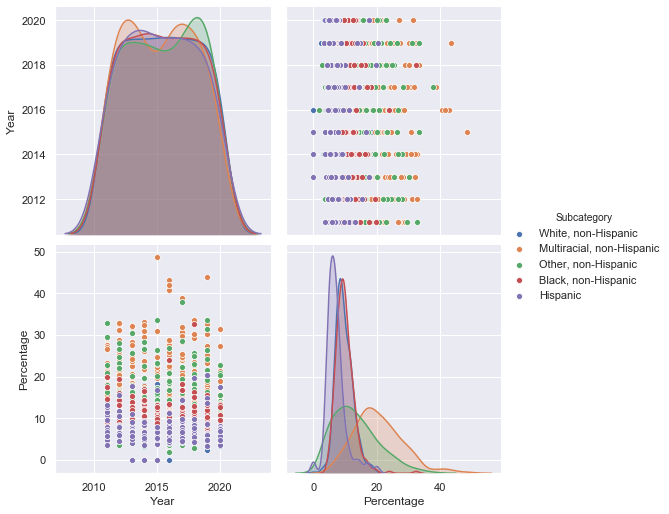

In [69]:
sns.pairplot(dfQ2RE,hue="Subcategory",height=3.5)

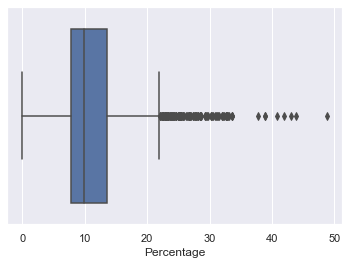

In [70]:
#Wide range of values
sns.boxplot(x=dfQ2RE['Percentage'])

In [71]:
# SMOKING

In [72]:
# df1a3: Age-adjusted prevalence of current smoking among adults >= 18 with diagnosed
# chronic obstructive pulmonary disease - overall, by gender, by race/ethnicity                                           

In [73]:
df1a3 = df1a[df1a['Question']==('Prevalence of current smoking among adults >= 18 with diagnosed chronic obstructive pulmonary disease')]
df1a3.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79690,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Race/Ethnicity,"White, non-Hispanic",2015,39.8,%,AK
79699,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2014,48.0,%,AK
79725,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Race/Ethnicity,"White, non-Hispanic",2017,33.7,%,AK
79731,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Race/Ethnicity,"White, non-Hispanic",2019,45.9,%,AK
79792,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Race/Ethnicity,"White, non-Hispanic",2013,50.1,%,AK


In [74]:
# Prevalence of smoking in adults >=18 diagnosed with COPD by Gender
# 
dfQ3G = df1a3[(df1a3['Category']=='Gender')]
dfQ3G.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79699,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2014,48.0,%,AK
79811,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2018,39.3,%,AK
79885,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Male,2016,30.2,%,AK
79901,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Male,2018,34.8,%,AK
79932,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2012,49.8,%,AK


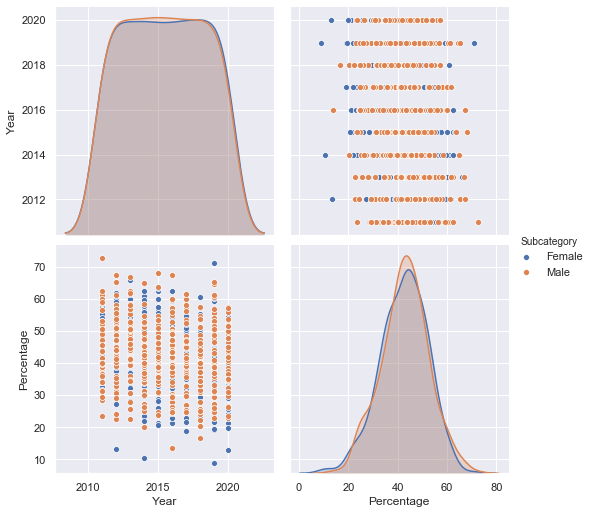

In [75]:
# Pairplot shows that men in the >18year age category smoke more than women, but not by much
# 
sns.pairplot(dfQ3G,hue="Subcategory",height=3.5)

In [76]:
# Prevalence of smoking in men >=18 diagnosed with COPD
# 
dfQ3M = df1a3[(df1a3['Category']=='Gender') & (df1a3['Subcategory'] == 'Male')]
dfQ3M.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79885,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Male,2016,30.2,%,AK
79901,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Male,2018,34.8,%,AK
79995,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Male,2014,37.6,%,AK
80013,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Male,2012,44.7,%,AK
80151,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Male,2013,58.1,%,AK


In [77]:
dfQ3M.groupby('Year').describe()

Percentage                                                         
          count       mean        std   min     25%    50%     75%   max
Year                                                                    
2011       52.0  45.121154   9.827160  23.6  38.525  45.30  51.150  72.6
2012       53.0  46.358491   9.499219  22.7  41.200  48.80  51.800  67.3
2013       52.0  46.267308   9.440624  22.7  41.450  46.60  51.300  66.8
2014       53.0  41.916981   8.511547  20.2  36.900  42.40  46.200  65.0
2015       53.0  42.609434   8.582277  23.7  36.700  41.60  48.500  68.1
2016       53.0  42.118868  10.494358  13.6  36.500  43.50  49.100  67.4
2017       52.0  43.051923   9.045278  24.7  38.600  41.05  46.800  61.5
2018       53.0  38.660377   8.932812  16.6  34.300  40.00  44.900  57.3
2019       52.0  43.767308  10.296691  22.9  36.875  44.10  51.075  65.3
2020       49.0  40.322449   8.844920  23.0  34.300  41.00  46.500  57.3

(<matplotlib.axes._subplots.AxesSubplot at 0xfcf6930>,
 Text(0.5, 1.0, 'Prevalence of current smoking among males >=18 with diagnosed COPD'))

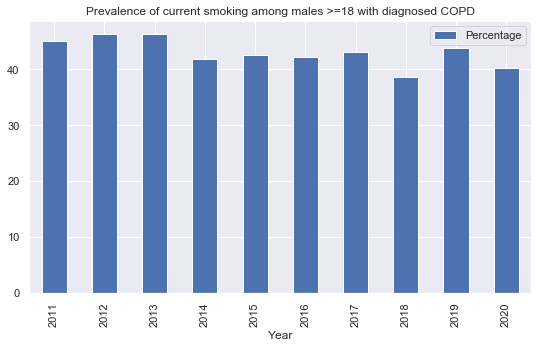

In [78]:
dfQ3M.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title('Prevalence of current smoking among males >=18 with diagnosed COPD')

In [79]:
# Prevalence of smoking in women >=18 diagnosed with COPD
# 
dfQ3F = df1a3[(df1a3['Category']=='Gender') & (df1a3['Subcategory'] == 'Female')]
dfQ3F.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79699,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2014,48.0,%,AK
79811,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2018,39.3,%,AK
79932,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2012,49.8,%,AK
80136,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2017,52.3,%,AK
80144,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2019,59.3,%,AK


In [80]:
dfQ3F.groupby('Year').describe()

Percentage                                                       
          count       mean        std   min     25%   50%    75%   max
Year                                                                  
2011       53.0  45.943396   7.570121  28.4  41.600  45.6  52.50  58.8
2012       53.0  45.556604   9.118019  13.3  42.000  45.3  51.00  61.7
2013       52.0  44.082692   8.236426  28.3  37.100  42.3  50.65  65.9
2014       53.0  43.349057  10.607066  10.4  35.800  45.1  49.90  62.4
2015       52.0  42.651923   9.913162  20.7  35.775  42.6  49.05  63.3
2016       52.0  41.355769   9.036580  21.2  34.600  41.6  47.50  62.3
2017       53.0  42.545283   9.794378  18.9  36.000  45.0  49.00  61.6
2018       53.0  40.426415   8.636242  22.7  35.800  39.9  46.80  60.6
2019       53.0  40.647170  11.305897   8.9  34.700  41.2  47.60  71.1
2020       53.0  39.156604   9.362743  12.8  34.500  38.4  45.70  54.2

(<matplotlib.axes._subplots.AxesSubplot at 0xff900b0>,
 Text(0.5, 1.0, 'Prevalence of current smoking among females >=18 with diagnosed COPD'))

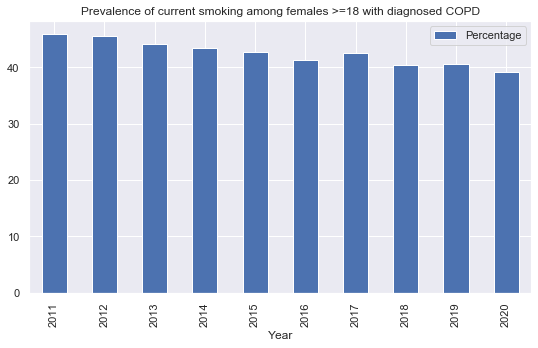

In [81]:
dfQ3F.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title('Prevalence of current smoking among females >=18 with diagnosed COPD')

In [82]:
# Smoking incidence in adults >=18 with diagnosed COPD in New York State by Gender
# 
dfQ3NYG = df1a3[(df1a3['Category']=='Gender') & (df1a3['Location'] == 'NY')]
dfQ3NYG.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
116006,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2017,30.7,%,NY
116064,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Male,2018,34.3,%,NY
116107,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2011,40.5,%,NY
116128,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Male,2016,46.6,%,NY
116156,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2015,44.5,%,NY


In [83]:
dfQ3NYG.groupby(['Year','Subcategory'])

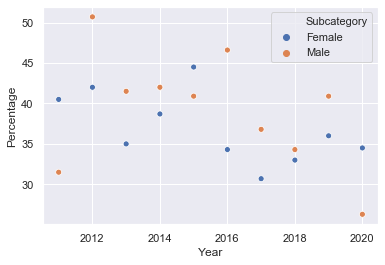

In [84]:
sns.scatterplot(data=dfQ3NYG,x="Year",y="Percentage",hue="Subcategory")
plt.show()

In [85]:
# Overall prevalence of smoking in adults >=18 diagnosed with COPD
# 
dfQ3O = df1a3[df1a3['Category']=='Overall']
dfQ3O.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
80106,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Overall,Overall,2018,40.8,%,AK
80160,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Overall,Overall,2014,47.6,%,AK
80182,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Overall,Overall,2016,44.7,%,AK
80289,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Overall,Overall,2012,48.0,%,AK
80438,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Overall,Overall,2019,54.4,%,AK


In [86]:
dfQ3O.groupby('Year').describe()

Percentage                                                        
          count       mean       std   min     25%    50%     75%   max
Year                                                                   
2011       54.0  45.250000  8.328894  13.8  40.200  47.20  51.075  57.8
2012       54.0  45.883333  8.427667  19.5  41.800  46.40  49.725  63.0
2013       54.0  44.188889  8.547639   7.4  40.450  45.35  48.875  60.6
2014       54.0  42.840741  8.636616  15.7  37.475  43.80  49.525  56.0
2015       54.0  42.309259  8.150779  17.6  37.875  43.20  48.525  56.8
2016       53.0  42.150943  8.316194  21.5  38.400  41.90  47.800  64.8
2017       54.0  42.757407  7.618810  25.1  39.375  42.40  49.400  55.0
2018       54.0  39.942593  7.971686  16.8  34.675  40.80  45.525  53.4
2019       53.0  41.716981  9.703523  14.0  36.600  42.70  47.300  67.0
2020       54.0  38.787037  9.177496  14.5  32.550  39.30  45.250  56.9

(<matplotlib.axes._subplots.AxesSubplot at 0x1000ed50>,
 Text(0.5, 1.0, 'Overall Prevalence of current smoking among adults >=18 with diagnosed COPD'))

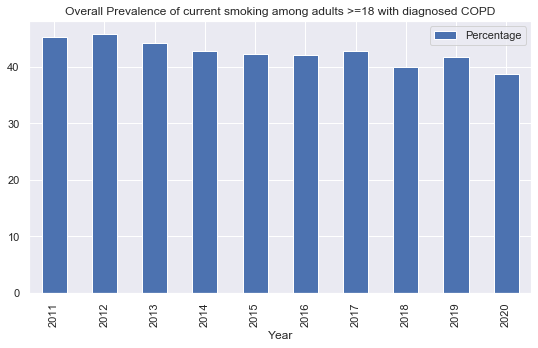

In [87]:
dfQ3O.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title('Overall Prevalence of current smoking among adults >=18 with diagnosed COPD')

In [88]:
# Overall prevalence of smoking in adults >=18 diagnosed with COPD in New York
# 
dfQ3NYO = df1a3[(df1a3['Category']=='Overall') & (df1a3['Location'] == 'NY')]
dfQ3NYO.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
115977,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Overall,Overall,2013,37.7,%,NY
116361,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Overall,Overall,2011,35.9,%,NY
116748,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Overall,Overall,2019,37.1,%,NY
116978,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Overall,Overall,2017,32.8,%,NY
116991,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Overall,Overall,2015,46.6,%,NY


(<matplotlib.axes._subplots.AxesSubplot at 0x1008b110>,
 Text(0.5, 1.0, 'Overall Prevalence of current smoking among adults >=18 with diagnosed COPD in New York'))

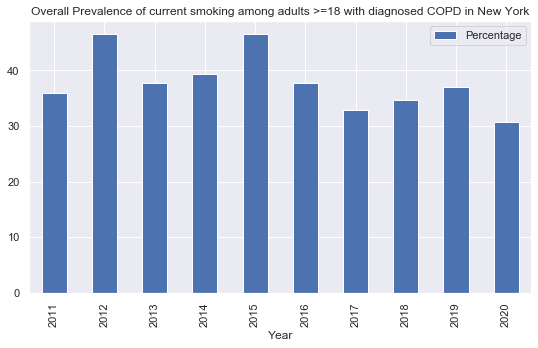

In [89]:
dfQ3NYO.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title('Overall Prevalence of current smoking among adults >=18 with diagnosed COPD in New York')

In [90]:
# Overall prevalence of smoking in adults >=18 diagnosed with COPD by Race/Ethnicity
# 
dfQ3RE = df1a3[df1a3['Category']== 'Race/Ethnicity']
dfQ3RE.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79690,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Race/Ethnicity,"White, non-Hispanic",2015,39.8,%,AK
79725,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Race/Ethnicity,"White, non-Hispanic",2017,33.7,%,AK
79731,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Race/Ethnicity,"White, non-Hispanic",2019,45.9,%,AK
79792,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Race/Ethnicity,"White, non-Hispanic",2013,50.1,%,AK
80215,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Race/Ethnicity,"White, non-Hispanic",2011,40.6,%,AK


In [91]:
dfQ3RE.groupby(['Subcategory','Year']).describe().round(2)

Percentage                                    \
                                    count   mean    std   min    25%    50%   
Subcategory               Year                                                
Black, non-Hispanic       2011       22.0  40.69   9.76  21.0  33.00  40.20   
                          2012       20.0  41.38  10.85  17.0  35.83  40.30   
                          2013       23.0  37.10   6.99  24.7  30.95  35.70   
                          2014       19.0  36.32  10.69  17.3  32.45  34.40   
                          2015       21.0  35.43   8.41  19.9  30.10  35.90   
                          2016       20.0  35.73   8.32  16.2  30.35  36.40   
                          2017       20.0  34.06   8.71  18.7  28.55  32.15   
                          2018       21.0  39.43  12.31  20.8  31.60  37.40   
                          2019       20.0  39.06  13.02  23.3  30.55  36.25   
                          2020       15.0  34.81  10.92  22.8  27.65  31.40   
Hispanic                  2011        7.0  28.33  11.14  13.8  20.05  28.80   
                          2012        7.0  31.81  10.26  19.7  24.25  27.90   
                          2013        7.0  28.09  11.95   7.3  23.05  30.30   
                          2014        9.0  25.37   6.74  15.9  19.00  27.90   
                          2015        9.0  29.09  11.58  16.2  19.90  24.10   
                          2016        7.0  28.91   7.68  18.6  22.95  29.40   
                          2017        6.0  28.65   5.94  20.3  24.30  30.65   
                          2018        4.0  25.18   9.41  17.0  17.23  24.25   
                          2019        6.0  29.07  10.35  14.1  22.00  31.15   
                          2020        4.0  23.78   7.13  14.4  20.62  24.80   
Multiracial, non-Hispanic 2011        4.0  55.82  11.26  45.7  46.75  54.45   
                          2012        3.0  45.50   3.44  42.6  43.60  44.60   
                          2013        4.0  34.42   7.44  25.1  30.57  35.10   
                          2014        3.0  47.80  16.67  34.5  38.45  42.40   
                          2015        3.0  33.53  15.93  19.6  24.85  30.10   
                          2016        3.0  54.17  20.30  33.8  44.05  54.30   
                          2017        2.0  39.20   3.11  37.0  38.10  39.20   
                          2018        2.0  40.40   5.37  36.6  38.50  40.40   
                          2019        2.0  36.20   1.27  35.3  35.75  36.20   
                          2020        2.0  45.25  21.99  29.7  37.47  45.25   
Other, non-Hispanic       2011        3.0  65.20  13.05  50.2  60.85  71.50   
                          2012        5.0  51.62  10.59  42.3  45.40  49.80   
                          2013        4.0  51.00  10.93  36.8  45.50  52.85   
                          2014        6.0  47.33  14.55  27.5  36.82  49.20   
                          2015        3.0  37.83   7.43  33.1  33.55  34.00   
                          2016        3.0  40.60  13.33  30.9  33.00  35.10   
                          2017        3.0  38.53  21.51  16.7  27.95  39.20   
                          2018        6.0  41.37  13.18  18.0  39.12  43.75   
                          2019        6.0  48.68  13.43  32.6  42.42  46.05   
                          2020        2.0  34.35   2.90  32.3  33.32  34.35   
White, non-Hispanic       2011       50.0  47.83   7.17  32.9  43.00  48.90   
                          2012       51.0  48.40   6.93  31.0  43.65  48.00   
                          2013       50.0  48.20   7.08  33.2  44.32  47.90   
                          2014       50.0  45.96   9.20  25.4  41.65  47.00   
                          2015       51.0  44.80   7.32  24.7  39.70  45.20   
                          2016       50.0  45.12   8.80  21.6  41.15  44.90   
                          2017       50.0  45.13   8.02  30.9  40.72  43.90   
                          2018       50.0  43.47   8.67  24.0  37.72  44.75   
  

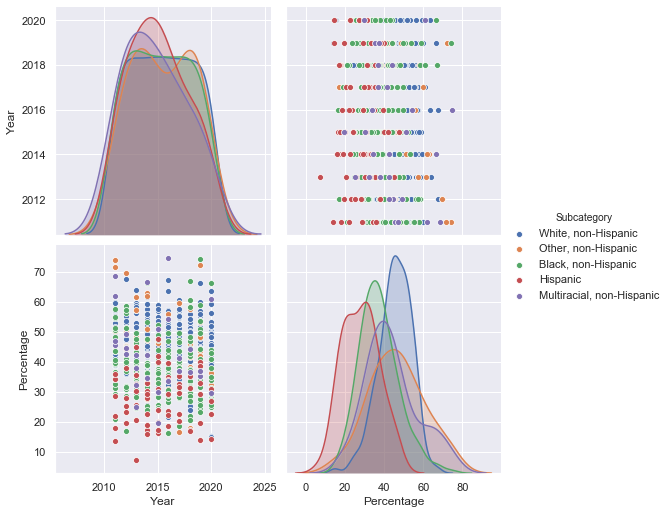

In [92]:
sns.pairplot(dfQ3RE,hue="Subcategory",height=3.5)

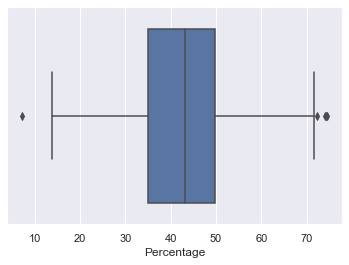

In [93]:
sns.boxplot(x=dfQ3RE['Percentage'])

In [94]:
# df1a4: Age-adjusted prevalence of current smoking among adults >= 45 years with diagnosed
# chronic obstructive pulmonary disease - overall, by gender, by race/ethnicity                                           

In [95]:
df1a4 = df1a[df1a['Question']==('Prevalence of current smoking among adults >= 45 years with diagnosed chronic obstructive pulmonary disease')]

In [96]:
# Prevalence of smoking in adults >=45 diagnosed with COPD by Gender
# 
dfQ4G = df1a4[(df1a4['Category']=='Gender')]
dfQ4G.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79691,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2018,45.1,%,AK
79727,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2014,45.8,%,AK
79820,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2011,45.2,%,AK
79839,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2016,44.0,%,AK
79908,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Male,2011,38.4,%,AK


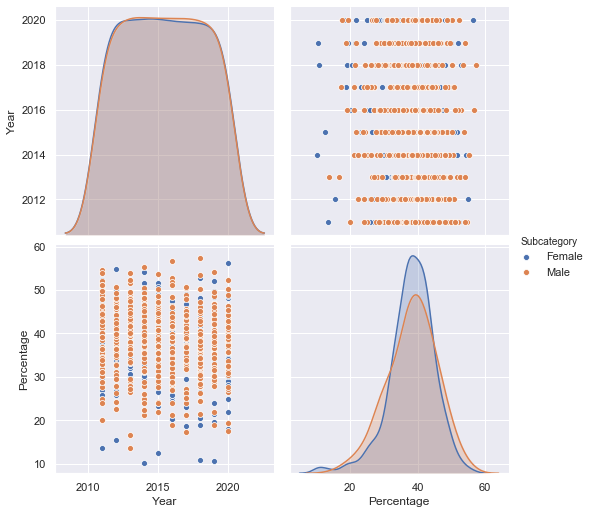

In [97]:
# Incidence of smoking among individuals >=45 with diagnosed COPD
# 
sns.pairplot(dfQ4G,hue="Subcategory",height=3.5)

In [98]:
# Prevalence of smoking in men >=45 diagnosed with COPD
# 
dfQ4M = df1a4[(df1a4['Category']=='Gender') & (df1a4['Subcategory'] == 'Male')]
dfQ4M.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79908,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Male,2011,38.4,%,AK
79961,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Male,2016,39.6,%,AK
80001,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Male,2014,35.6,%,AK
80158,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Male,2018,39.4,%,AK
80349,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Male,2015,30.1,%,AK


In [99]:
dfQ4M.groupby('Year').describe()

Percentage                                                        
          count       mean       std   min     25%    50%     75%   max
Year                                                                   
2011       51.0  39.349020  8.504243  20.0  33.400  39.20  45.950  54.7
2012       50.0  39.020000  6.715258  22.5  35.200  39.90  43.925  50.8
2013       53.0  39.858491  7.956189  13.7  36.700  40.80  44.400  53.9
2014       52.0  37.776923  7.649545  21.1  34.100  38.00  42.425  55.3
2015       52.0  39.165385  7.342273  21.8  34.350  40.70  44.650  53.6
2016       52.0  37.961538  7.872144  19.0  32.850  39.10  41.850  56.7
2017       52.0  37.784615  7.431475  17.3  33.475  38.95  43.125  50.8
2018       52.0  36.523077  7.479373  21.4  31.475  36.70  39.500  57.3
2019       50.0  38.300000  7.054337  18.8  34.475  38.70  42.825  54.1
2020       50.0  37.712000  7.238210  17.5  32.925  38.40  42.800  52.2

(<matplotlib.axes._subplots.AxesSubplot at 0x10834750>,
 Text(0.5, 1.0, 'Prevalence of current smoking among males >=45 with diagnosed COPD'))

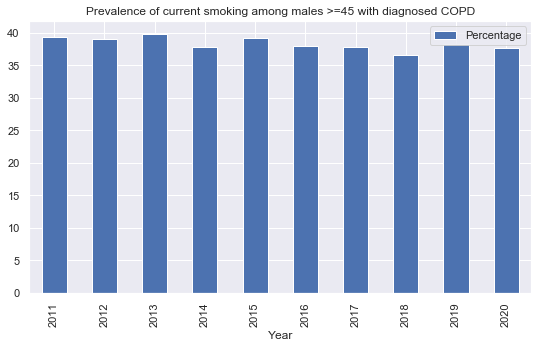

In [100]:
dfQ4M.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title('Prevalence of current smoking among males >=45 with diagnosed COPD')

In [101]:
# Prevalence of smoking in women >=45 diagnosed with COPD
# 
dfQ4F = df1a4[(df1a4['Category']=='Gender') & (df1a4['Subcategory'] == 'Female')]
dfQ4F.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79691,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2018,45.1,%,AK
79727,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2014,45.8,%,AK
79820,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2011,45.2,%,AK
79839,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2016,44.0,%,AK
80075,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2015,51.6,%,AK


In [102]:
dfQ4F.groupby('Year').describe()

Percentage                                                       
          count       mean       std   min     25%   50%     75%   max
Year                                                                  
2011       53.0  39.613208  7.024820  13.5  36.600  40.3  43.800  52.3
2012       53.0  38.458491  6.301814  15.5  36.000  38.2  41.200  54.8
2013       52.0  38.248077  4.742858  27.7  35.000  37.9  42.450  46.3
2014       53.0  38.728302  7.675595  10.2  33.800  38.2  43.600  54.2
2015       53.0  39.728302  6.989838  12.5  36.400  40.8  43.300  51.6
2016       52.0  36.413462  6.234818  20.4  32.475  36.0  41.525  47.5
2017       52.0  38.776923  6.058008  18.7  36.100  39.5  42.800  49.1
2018       52.0  37.628846  7.595028  10.9  33.675  38.8  42.475  52.8
2019       51.0  38.050980  7.550718  10.6  34.900  39.2  42.400  52.0
2020       52.0  37.180769  7.082512  18.1  33.850  37.0  41.875  56.3

(<matplotlib.axes._subplots.AxesSubplot at 0x10857050>,
 Text(0.5, 1.0, 'Prevalence of current smoking among females >=45 with diagnosed COPD'))

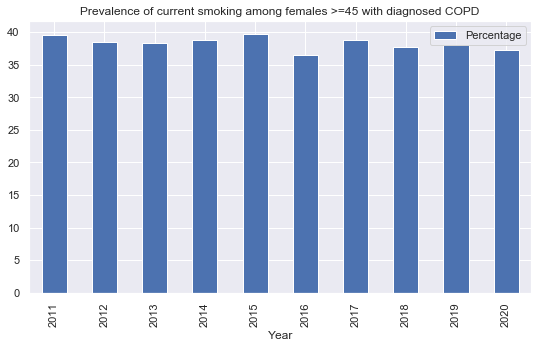

In [103]:
dfQ4F.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title('Prevalence of current smoking among females >=45 with diagnosed COPD')

In [104]:
#Prevalence of smoking in adults >=45 with diagnosed COPD by Gender in New York
# 
dfQ4NYG = df1a4[(df1a4['Category']=='Gender') & (df1a4['Location'] == 'NY')]
dfQ4NYG.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
116003,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2013,36.2,%,NY
116097,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Female,2015,43.3,%,NY
116110,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Male,2013,44.4,%,NY
116182,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Male,2015,43.6,%,NY
116195,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Gender,Male,2017,34.6,%,NY


In [105]:
dfQ4NYG.groupby(['Year','Subcategory'])

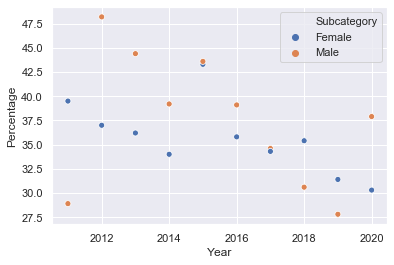

In [106]:
# In New York, men smoked more than women in most years of the survey
sns.scatterplot(data=dfQ4NYG,x="Year",y="Percentage",hue="Subcategory")
plt.show()

In [107]:
# Overall prevalence of smoking in adults >=45 with diagnosed COPD

dfQ4O = df1a4[df1a4['Category']=='Overall']
dfQ4O.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79707,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Overall,Overall,2014,41.1,%,AK
79729,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Overall,Overall,2016,41.9,%,AK
79824,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Overall,Overall,2018,42.3,%,AK
79985,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Overall,Overall,2019,41.3,%,AK
80031,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Overall,Overall,2011,41.2,%,AK


In [108]:
dfQ4O.groupby('Year').describe()

Percentage                                                        
          count       mean       std   min     25%    50%     75%   max
Year                                                                   
2011       53.0  39.345283  6.450598  16.5  35.800  39.90  42.000  49.9
2012       54.0  38.355556  6.268510  12.9  36.200  38.60  42.250  51.3
2013       54.0  38.342593  6.306499   7.8  37.025  39.10  41.175  48.5
2014       53.0  38.196226  6.713246  16.8  34.600  39.20  43.100  52.2
2015       53.0  39.120755  6.447103  11.5  36.300  41.10  43.100  48.9
2016       53.0  36.435849  7.289774   8.3  34.000  37.40  41.500  49.4
2017       54.0  38.111111  5.647396  21.9  35.425  39.35  42.100  46.6
2018       54.0  36.905556  6.094985  13.2  34.075  37.40  41.025  50.6
2019       53.0  37.583019  6.900466  11.2  36.200  38.90  41.500  49.5
2020       54.0  36.561111  6.689231  14.1  33.275  37.75  40.700  47.1

(<matplotlib.axes._subplots.AxesSubplot at 0x10da2eb0>,
 Text(0.5, 1.0, 'Overall Prevalence of current smoking among adults >=45 with diagnosed COPD'))

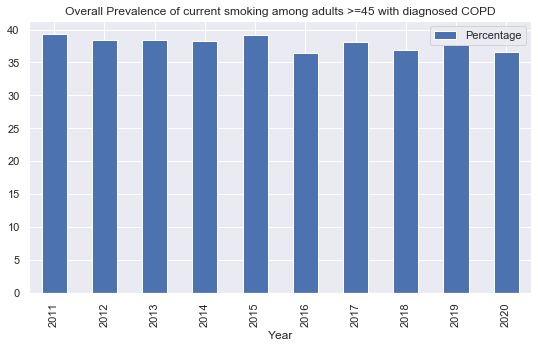

In [109]:
dfQ4O.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title('Overall Prevalence of current smoking among adults >=45 with diagnosed COPD')

In [110]:
# Overall prevalence of smoking in adults >=45 with diagnosed COPD in New York
# 
dfQ4NYO = df1a4[(df1a4['Category']=='Overall') & (df1a4['Location'] == 'NY')]
dfQ4NYO.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
116593,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Overall,Overall,2016,37.2,%,NY
116604,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Overall,Overall,2014,37.0,%,NY
116632,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Overall,Overall,2018,33.1,%,NY
116878,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Overall,Overall,2012,43.3,%,NY
116955,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Overall,Overall,2019,30.1,%,NY


(<matplotlib.axes._subplots.AxesSubplot at 0x10f17250>,
 Text(0.5, 1.0, 'Overall Prevalence of current smoking among adults >=45 with diagnosed COPD in New York'))

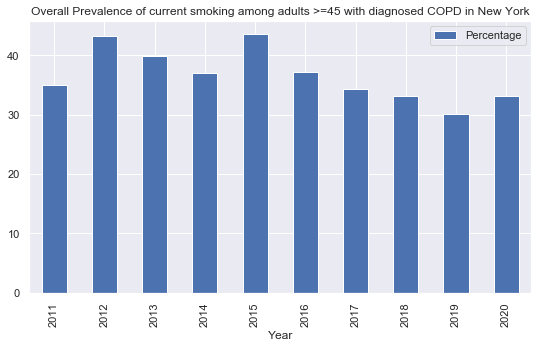

In [111]:
dfQ4NYO.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title('Overall Prevalence of current smoking among adults >=45 with diagnosed COPD in New York')

In [112]:
# Prevalence of smoking in adults >=45 with diagnosed COPD by Race/Ethnicity
# 
dfQ4RE = df1a4[df1a4['Category']== 'Race/Ethnicity']
dfQ4RE.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79728,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Race/Ethnicity,"White, non-Hispanic",2016,37.4,%,AK
79785,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Race/Ethnicity,"White, non-Hispanic",2012,39.7,%,AK
79799,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Race/Ethnicity,"White, non-Hispanic",2014,45.1,%,AK
80015,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Race/Ethnicity,"White, non-Hispanic",2018,41.3,%,AK
80218,BRFSS,Age-adjusted Prevalence,Prevalence of current smoking among adults >= ...,Race/Ethnicity,"White, non-Hispanic",2019,50.6,%,AK


In [113]:
dfQ4RE.groupby(['Subcategory','Year']).describe().round(2)

Percentage                                    \
                                    count   mean    std   min    25%    50%   
Subcategory               Year                                                
Black, non-Hispanic       2011       18.0  35.87   8.99  22.2  29.28  34.70   
                          2012       16.0  34.45   7.19  21.7  29.52  34.55   
                          2013       20.0  35.96   7.48  19.1  33.05  37.00   
                          2014       17.0  36.18  10.19  23.4  29.40  31.20   
                          2015       20.0  35.66  11.82  17.8  29.48  34.25   
                          2016       17.0  33.33   8.71  23.2  27.30  30.10   
                          2017       16.0  36.60  11.10  19.3  30.38  35.40   
                          2018       16.0  32.07   9.18  13.9  25.80  32.00   
                          2019       16.0  32.54   8.55  19.1  26.45  32.50   
                          2020       13.0  32.12   9.37  17.4  26.40  32.40   
Hispanic                  2011        4.0  26.75   6.99  16.7  24.95  28.85   
                          2012        3.0  21.23   7.56  13.2  17.75  22.30   
                          2013        5.0  32.20  15.76   7.6  27.40  38.40   
                          2014        6.0  21.77   4.41  16.9  19.48  20.85   
                          2015        4.0  38.22  21.38  10.5  27.67  41.45   
                          2016        5.0  24.76  11.72   8.3  20.10  25.20   
                          2017        6.0  27.12   8.52  15.9  21.08  27.55   
                          2018        3.0  25.40  10.88  13.7  20.50  27.30   
                          2019        4.0  27.10  14.88  11.3  17.15  26.15   
                          2020        5.0  24.40   6.28  14.4  22.30  27.40   
Multiracial, non-Hispanic 2011        2.0  33.65   3.04  31.5  32.58  33.65   
                          2012        2.0  42.30   1.27  41.4  41.85  42.30   
                          2013        3.0  36.00  11.29  26.8  29.70  32.60   
                          2014        2.0  45.30   6.36  40.8  43.05  45.30   
                          2015        2.0  42.55   7.71  37.1  39.83  42.55   
                          2016        2.0  39.90  19.09  26.4  33.15  39.90   
                          2017        1.0  33.20    NaN  33.2  33.20  33.20   
                          2018        1.0  50.80    NaN  50.8  50.80  50.80   
                          2019        2.0  34.00   9.19  27.5  30.75  34.00   
Other, non-Hispanic       2011        3.0  56.00   4.71  50.7  54.15  57.60   
                          2012        1.0  49.60    NaN  49.6  49.60  49.60   
                          2013        4.0  52.28   5.72  44.3  50.23  53.75   
                          2014        3.0  53.77  11.07  45.0  47.55  50.10   
                          2015        2.0  52.30  17.82  39.7  46.00  52.30   
                          2016        2.0  43.10   6.22  38.7  40.90  43.10   
                          2017        4.0  34.25   6.09  29.0  29.52  33.05   
                          2018        4.0  37.38  12.08  26.0  27.50  37.05   
                          2019        6.0  44.88  10.26  32.9  38.18  45.30   
                          2020        1.0  35.30    NaN  35.3  35.30  35.30   
White, non-Hispanic       2011       50.0  41.27   5.84  25.7  36.80  42.15   
                          2012       50.0  39.73   5.85  22.1  36.85  40.35   
                          2013       50.0  39.75   5.99  14.0  37.20  40.35   
                          2014       50.0  39.97   6.57  24.5  36.75  39.70   
                          2015       50.0  40.27   5.87  15.9  38.42  41.50   
                          2016       50.0  38.83   5.61  21.8  35.68  39.45   
                          2017       50.0  39.31   6.56  15.2  36.60  40.50   
                          2018       51.0  39.16   5.45  28.3  35.20  39.30   
                          2019       49.0  39.58   6.42  21.0  35.00  39.80   
  

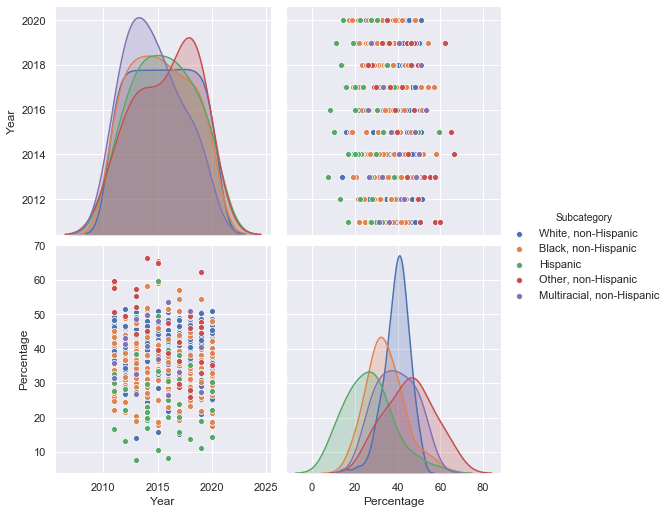

In [114]:
sns.pairplot(dfQ4RE,hue="Subcategory",height=3.5)

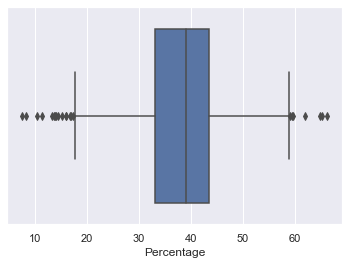

In [115]:
sns.boxplot(x=dfQ4RE['Percentage'])

In [116]:
# ACTIVITY LIMITATION

In [117]:
# df1a5: Age-adjusted prevalence of activity limitation among adults >= 18 with diagnosed
# chronic obstructive pulmonary disease - overall, by gender, by race/ethnicity                                           

In [118]:
df1a5 = df1a[df1a['Question']==('Prevalence of activity limitation among adults >= 18 with diagnosed chronic obstructive pulmonary disease')]

In [119]:
# Activity limitation in adults >=18 with diagnosed COPD by Gender
# 
dfQ5G = df1a5[(df1a5['Category']=='Gender')]
dfQ5G.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79683,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2015,40.5,%,AK
79760,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2013,37.0,%,AK
79765,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Female,2015,46.8,%,AK
79816,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Female,2013,47.2,%,AK
79941,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Female,2011,65.5,%,AK


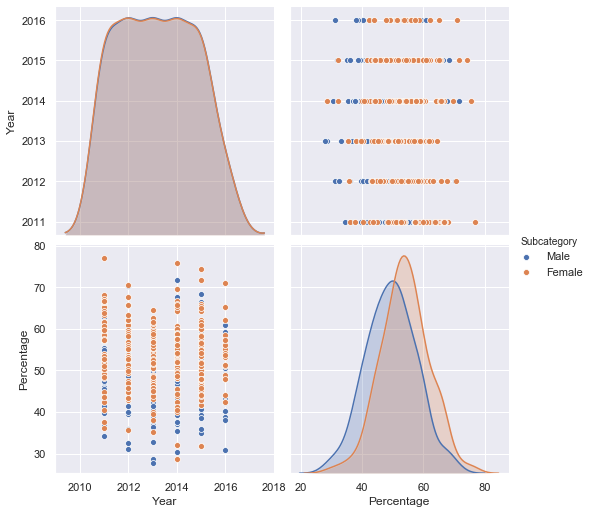

In [120]:
# Pairplot shows a higher incidence of activity limitation in women >=18 years old with
# diagnosed COPD
# 
sns.pairplot(dfQ5G,hue="Subcategory",height=3.5)

In [121]:
# Activity limitation in men >=18 with diagnosed COPD
# 
dfQ5M = df1a5[(df1a5['Category']=='Gender') & (df1a5['Subcategory'] == 'Male')]
dfQ5M.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79683,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2015,40.5,%,AK
79760,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2013,37.0,%,AK
80025,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2011,51.1,%,AK
80078,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2014,43.0,%,AK
80092,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2012,53.9,%,AK


In [122]:
dfQ5M.groupby('Year').describe()

Percentage                                                    
          count       mean       std   min   25%   50%    75%   max
Year                                                               
2011       53.0  51.126415  7.718912  34.3  45.7  51.1  55.50  67.6
2012       53.0  50.786792  8.233539  31.2  45.4  51.5  57.10  70.3
2013       53.0  47.064151  7.497643  27.8  42.4  47.7  52.60  61.5
2014       53.0  48.916981  9.043033  30.5  43.0  48.2  53.30  71.8
2015       53.0  50.360377  8.131168  31.8  44.7  50.8  55.90  68.3
2016       19.0  47.936842  7.881146  31.0  42.3  49.1  54.45  61.0

(<matplotlib.axes._subplots.AxesSubplot at 0x119bb790>,
 Text(0.5, 1.0, 'Activity limitation among males >=18 with diagnosed COPD'))

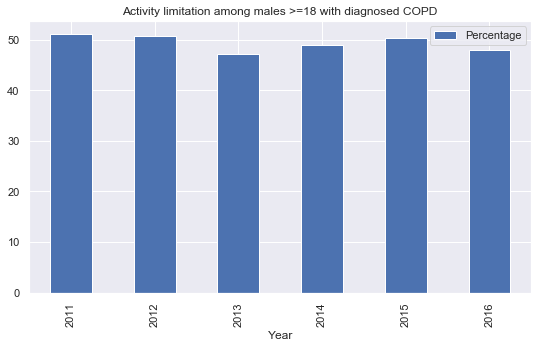

In [123]:
dfQ5M.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title('Activity limitation among males >=18 with diagnosed COPD')

In [124]:
# Activity limitation in women >=18 with diagnosed COPD
# 
dfQ5F = df1a5[(df1a5['Category']=='Gender') & (df1a5['Subcategory'] == 'Female')]
dfQ5F.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79765,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Female,2015,46.8,%,AK
79816,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Female,2013,47.2,%,AK
79941,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Female,2011,65.5,%,AK
80124,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Female,2016,42.3,%,AK
80161,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Female,2014,60.6,%,AK


In [125]:
dfQ5F.groupby('Year').describe()

Percentage                                                       
          count       mean       std   min     25%   50%     75%   max
Year                                                                  
2011       54.0  56.755556  8.654166  36.1  51.175  57.3  64.075  77.0
2012       53.0  54.213208  6.960991  35.7  49.900  55.1  59.300  70.6
2013       53.0  51.530189  6.673039  35.2  47.200  51.7  56.800  64.6
2014       53.0  53.775472  8.892173  28.6  49.500  53.9  58.800  75.7
2015       53.0  53.315094  7.856144  31.9  47.600  53.5  57.700  74.4
2016       19.0  54.436842  7.010644  42.3  50.000  54.2  57.400  71.1

(<matplotlib.axes._subplots.AxesSubplot at 0x11a0a790>,
 Text(0.5, 1.0, 'Activity limitation among females >=18 with diagnosed COPD'))

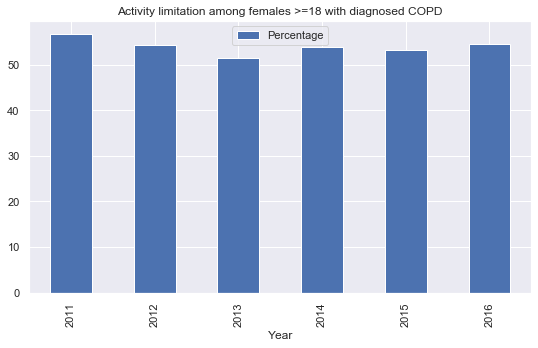

In [126]:
dfQ5F.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title('Activity limitation among females >=18 with diagnosed COPD')

In [127]:
# Activity limitation in adults >=18 with diagnosed COPD by Gender in New York
# 
dfQ5NYG = df1a5[(df1a5['Category']=='Gender') & (df1a5['Location'] == 'NY')]
dfQ5NYG.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
116511,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Female,2013,48.0,%,NY
116551,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Female,2015,47.9,%,NY
116564,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2016,38.1,%,NY
116633,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2012,55.8,%,NY
116687,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2014,44.6,%,NY


In [128]:
dfQ5NYG.groupby(['Year','Subcategory']).mean()

Percentage
Year Subcategory            
2011 Female             58.5
     Male               36.7
2012 Female             59.3
     Male               55.8
2013 Female             48.0
     Male               27.8
2014 Female             60.0
     Male               44.6
2015 Female             47.9
     Male               51.0
2016 Female             54.2
     Male               38.1

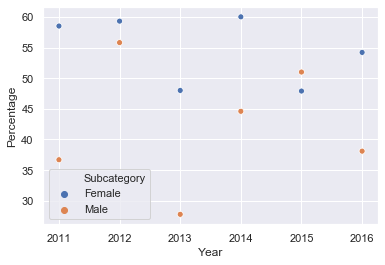

In [129]:
sns.scatterplot(data=dfQ5NYG,x="Year",y="Percentage",hue="Subcategory")
plt.show()

In [130]:
# Overall activity limitation prevalence in adults >=18 with diagnosed COPD
# 
dfQ5O = df1a5[df1a5['Category']=='Overall']
dfQ5O.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79988,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Overall,Overall,2013,43.4,%,AK
80000,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Overall,Overall,2015,44.6,%,AK
80355,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Overall,Overall,2011,54.4,%,AK
80995,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Overall,Overall,2016,42.3,%,AK
81063,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Overall,Overall,2014,59.5,%,AK


In [131]:
dfQ5O.groupby('Year').describe()

Percentage                                                        
          count       mean       std   min     25%    50%     75%   max
Year                                                                   
2011       54.0  53.527778  6.994376  35.7  48.725  53.50  59.175  64.4
2012       54.0  52.238889  6.059872  35.6  47.950  53.00  57.075  62.9
2013       54.0  49.142593  5.938382  33.9  45.525  50.50  53.675  58.7
2014       54.0  52.014815  7.125993  34.3  47.775  53.35  58.225  63.5
2015       54.0  51.555556  6.645687  36.1  48.000  51.60  54.900  70.0
2016       19.0  51.321053  6.364535  40.1  46.300  53.50  55.200  66.0

(<matplotlib.axes._subplots.AxesSubplot at 0x11a8bb70>,
 Text(0.5, 1.0, 'Overall Activity Limitation among adults >=18 with diagnosed COPD'))

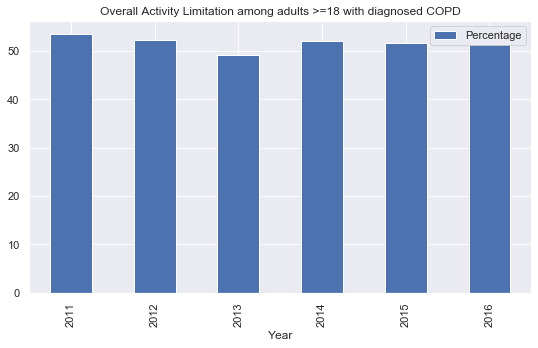

In [132]:
dfQ5O.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title('Overall Activity Limitation among adults >=18 with diagnosed COPD')

In [133]:
# Overall activity limitation prevalence in adults >=18 with diagnosed COPD in New York
# 
dfQ5NYO = df1a5[(df1a5['Category']=='Overall') & (df1a5['Location'] == 'NY')]
dfQ5NYO.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
116434,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Overall,Overall,2011,48.7,%,NY
116483,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Overall,Overall,2015,47.8,%,NY
117100,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Overall,Overall,2012,57.2,%,NY
117612,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Overall,Overall,2013,39.7,%,NY
117819,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Overall,Overall,2016,48.8,%,NY


(<matplotlib.axes._subplots.AxesSubplot at 0x11adf610>,
 Text(0.5, 1.0, 'Overall Activity Limitation among adults >=18 with diagnosed COPD in New York'))

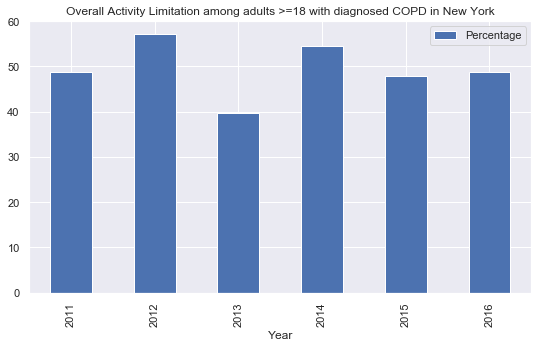

In [134]:
dfQ5NYO.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title('Overall Activity Limitation among adults >=18 with diagnosed COPD in New York')

In [135]:
# Overall activity limitation in adults >=18 with diagnosed COPD by Race/Ethnicity
# 
dfQ5RE = df1a5[df1a5['Category']== 'Race/Ethnicity']
dfQ5RE.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79882,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Race/Ethnicity,"White, non-Hispanic",2013,48.2,%,AK
79892,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Race/Ethnicity,"White, non-Hispanic",2011,54.4,%,AK
79998,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Race/Ethnicity,"White, non-Hispanic",2015,53.5,%,AK
80249,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Race/Ethnicity,"White, non-Hispanic",2016,48.3,%,AK
80275,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Race/Ethnicity,"White, non-Hispanic",2012,59.2,%,AK


In [136]:
dfQ5RE.groupby(['Subcategory','Year']).describe().round(2)

Percentage                                    \
                                    count   mean    std   min    25%    50%   
Subcategory               Year                                                
Black, non-Hispanic       2011       22.0  54.31  11.53  29.6  47.90  56.85   
                          2012       21.0  47.52   9.56  30.0  43.80  47.20   
                          2013       23.0  46.84   9.45  25.6  40.70  45.10   
                          2014       20.0  47.01  12.34  23.6  41.20  47.80   
                          2015       21.0  49.54  11.28  33.5  41.60  49.50   
                          2016       11.0  47.92  10.23  35.6  41.05  42.80   
Hispanic                  2011        8.0  48.98   9.02  38.5  43.15  45.80   
                          2012        9.0  49.89  10.15  36.1  45.50  49.20   
                          2013        9.0  46.12  16.14  30.5  34.80  41.60   
                          2014       10.0  44.29   9.37  29.2  39.10  44.15   
                          2015        9.0  47.33  14.53  27.5  40.10  43.80   
                          2016        3.0  44.80   7.72  37.4  40.80  44.20   
Multiracial, non-Hispanic 2011        4.0  79.25  18.13  52.9  75.40  85.15   
                          2012        3.0  63.67  21.38  39.5  55.45  71.40   
                          2013        3.0  55.67   9.97  45.1  51.05  57.00   
                          2014        3.0  54.83  17.17  38.6  45.85  53.10   
                          2015        3.0  61.40  28.81  35.8  45.80  55.80   
                          2016        3.0  64.17   5.53  60.3  61.00  61.70   
Other, non-Hispanic       2011        4.0  54.65  20.09  27.0  46.35  60.10   
                          2012        5.0  45.40  14.36  27.9  39.30  40.00   
                          2013        5.0  52.40  20.70  20.5  50.10  52.60   
                          2014        6.0  52.65  10.33  34.2  51.55  55.10   
                          2015        3.0  39.93  22.23  24.4  27.20  30.00   
                          2016        2.0  46.85  28.21  26.9  36.88  46.85   
White, non-Hispanic       2011       51.0  54.28   7.29  25.0  50.75  54.80   
                          2012       51.0  53.62   7.12  31.6  50.10  55.00   
                          2013       51.0  51.15   7.45  30.6  46.75  51.70   
                          2014       51.0  53.79   9.48  14.7  51.10  54.10   
                          2015       50.0  52.41   8.46  25.1  47.55  53.50   
                          2016       19.0  54.16   7.84  44.4  48.15  53.60   

                                             
                                  75%   max  
Subcategory               Year               
Black, non-Hispanic       2011  62.63  74.6  
                          2012  51.30  68.5  
                          2013  52.00  68.9  
                          2014  55.25  68.7  
                          2015  55.80  77.3  
                          2016  55.50  64.1  
Hispanic                  2011  53.40  64.5  
                          2012  55.90  65.0  
                          2013  50.00  84.7  
                          2014  47.92  62.1  
                          2015  51.00  72.8  
                          2016  48.50  52.8  
Multiracial, non-Hispanic 2011  89.00  93.8  
                          2012  75.75  80.1  
                          2013  60.95  64.9  
                          2014  62.95  72.8  
                          2015  74.20  92.6  
                          2016  66.10  70.5  
Other, non-Hispanic       2011  68.40  71.4  
                          2012  55.90  63.9  
                          2013  61.90  76.9  
                          2014  55.42  65.6  
                          2015  47.70  65.4  
                          2016  56.82  66.8  
White, non-Hispanic       2011  58.75  67.3  
                          2012  58.80  65.7  
                          2013  55.95  75.3  
                          2014  59.35  69.7

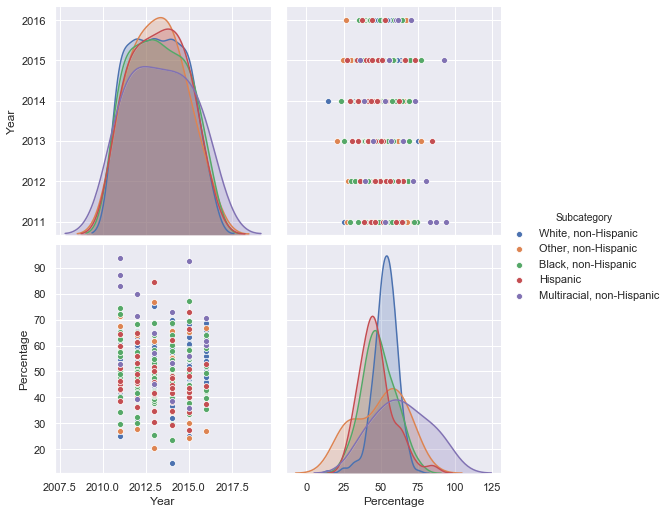

In [137]:
sns.pairplot(dfQ5RE,hue="Subcategory",height=3.5)

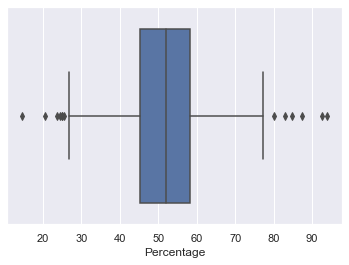

In [138]:
sns.boxplot(x=dfQ5RE['Percentage'])

In [139]:
# df1a6: Age-adjusted prevalence of activity limitation among adults >= 45 years with diagnosed
# chronic obstructive pulmonary disease - overall, by gender, by race/ethnicity                                           

In [140]:
df1a6 = df1a[df1a['Question']==('Prevalence of activity limitation among adults >= 45 years with diagnosed chronic obstructive pulmonary disease')]

In [141]:
# Activity limitation prevalence in adults >=45 with diagnosed COPD by Gender
# 
dfQ6G = df1a6[(df1a6['Category']=='Gender')]
dfQ6G.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79694,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2011,63.0,%,AK
79825,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2015,62.2,%,AK
79917,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Female,2015,69.2,%,AK
79968,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Female,2011,64.0,%,AK
80100,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2012,56.8,%,AK


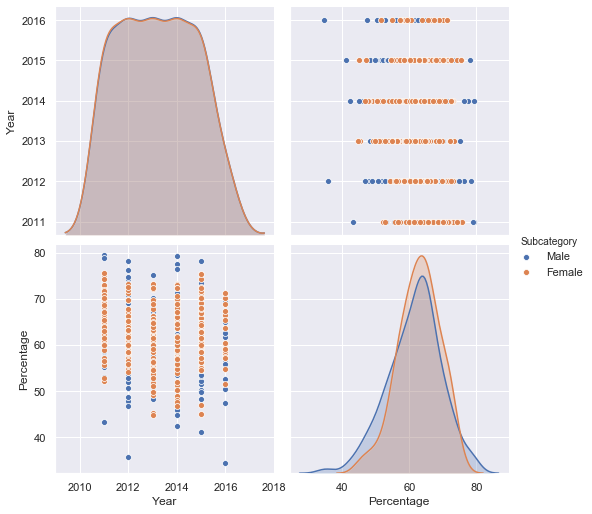

In [142]:
sns.pairplot(dfQ6G,hue="Subcategory",height=3.5)

In [143]:
# Activity limitation prevalence in men >=45 with diagnosed COPD
# 
dfQ6M = df1a6[(df1a6['Category']=='Gender') & (df1a6['Subcategory'] == 'Male')]
dfQ6M.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79694,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2011,63.0,%,AK
79825,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2015,62.2,%,AK
80100,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2012,56.8,%,AK
80233,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2013,69.7,%,AK
80852,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2016,52.7,%,AK


In [144]:
dfQ6M.groupby('Year').describe()

Percentage                                                      
          count       mean       std   min    25%   50%     75%   max
Year                                                                 
2011       52.0  65.325000  7.454170  43.3  61.30  65.4  69.675  79.4
2012       53.0  61.709434  8.482817  35.7  57.50  62.5  66.500  78.3
2013       53.0  60.913208  6.950430  45.1  55.10  62.7  66.100  75.1
2014       53.0  60.722642  8.284221  42.4  56.40  62.2  65.800  79.2
2015       53.0  60.894340  7.323997  41.2  56.10  62.4  65.300  78.2
2016       19.0  57.336842  7.834412  34.5  54.05  58.1  62.750  69.4

(<matplotlib.axes._subplots.AxesSubplot at 0x1270f8f0>,
 Text(0.5, 1.0, 'Activity Limitation among males >=45 with diagnosed COPD'))

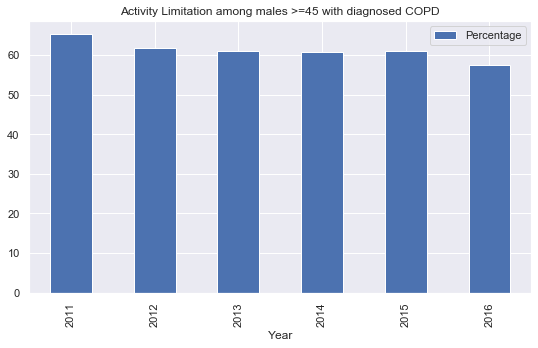

In [145]:
dfQ6M.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title('Activity Limitation among males >=45 with diagnosed COPD')

In [146]:
# Activity limitation prevalence in women >=45 with diagnosed COPD
#
dfQ6F = df1a6[(df1a6['Category']=='Gender') & (df1a6['Subcategory'] == 'Female')]
dfQ6F.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79917,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Female,2015,69.2,%,AK
79968,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Female,2011,64.0,%,AK
80159,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Female,2013,60.7,%,AK
80362,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Female,2012,58.7,%,AK
80936,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Female,2016,71.1,%,AK


In [147]:
dfQ6F.groupby('Year').describe()

Percentage                                                     
          count       mean       std   min    25%   50%    75%   max
Year                                                                
2011       53.0  66.330189  5.544838  52.3  63.30  66.8  70.80  75.6
2012       53.0  63.011321  4.606503  54.2  59.60  63.1  66.20  73.2
2013       53.0  60.528302  6.381716  44.8  56.30  61.6  64.80  73.3
2014       53.0  61.926415  6.949022  46.8  57.30  63.6  67.10  73.2
2015       53.0  62.952830  6.637064  45.0  58.40  62.8  67.70  75.4
2016       19.0  62.121053  5.794210  51.6  58.25  60.2  66.95  71.2

(<matplotlib.axes._subplots.AxesSubplot at 0x12aa32d0>,
 Text(0.5, 1.0, 'Activity Limitation among females >=45 with diagnosed COPD'))

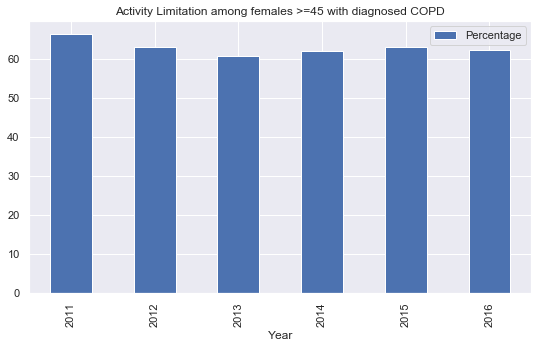

In [148]:
dfQ6F.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title('Activity Limitation among females >=45 with diagnosed COPD')

In [149]:
# Activity limitation prevalence in adults >=45 with diagnosed COPD in New York
# 
dfQ6NYG = df1a6[(df1a6['Category']=='Gender') & (df1a6['Location'] == 'NY')]
dfQ6NYG.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
116263,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2012,63.4,%,NY
116642,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Female,2015,55.2,%,NY
116706,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Female,2011,62.4,%,NY
116756,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2014,53.7,%,NY
116815,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Gender,Male,2016,58.6,%,NY


In [150]:
dfQ6NYG.groupby(['Year','Subcategory'])

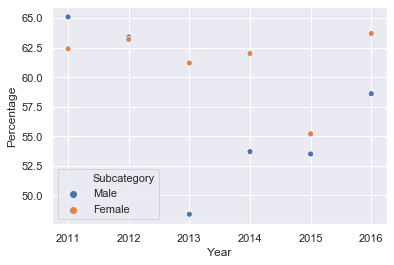

In [151]:
# Scatterplot shows higher incidence of activity limitation for women >=45 for most years
# (2011 - 2016, New York)
#
sns.scatterplot(data=dfQ6NYG,x="Year",y="Percentage",hue="Subcategory")
plt.show()

In [152]:
# Overall incidence of activity limitation in adults >=45 with diagnosed COPD
# 
dfQ6O = df1a6[df1a6['Category']=='Overall']
dfQ6O.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79821,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Overall,Overall,2013,64.8,%,AK
79916,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Overall,Overall,2011,63.2,%,AK
80267,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Overall,Overall,2015,65.1,%,AK
80594,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Overall,Overall,2014,67.5,%,AK
80612,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Overall,Overall,2016,63.4,%,AK


In [153]:
dfQ6O.groupby('Year').describe()

Percentage                                                       
          count       mean       std   min     25%   50%     75%   max
Year                                                                  
2011       53.0  65.809434  5.166581  48.6  62.700  67.2  69.900  73.6
2012       54.0  62.155556  5.536386  48.8  58.600  63.7  65.600  75.1
2013       54.0  60.542593  5.597156  46.9  56.875  61.4  64.675  71.3
2014       53.0  61.428302  6.497170  44.3  58.200  63.2  65.800  73.4
2015       53.0  62.033962  5.390303  47.3  59.600  61.8  65.000  72.3
2016       19.0  60.200000  4.911438  45.9  57.650  61.5  63.500  65.9

(<matplotlib.axes._subplots.AxesSubplot at 0x12a08390>,
 Text(0.5, 1.0, 'Overall Activity Limitation among adults >=45 with diagnosed COPD'))

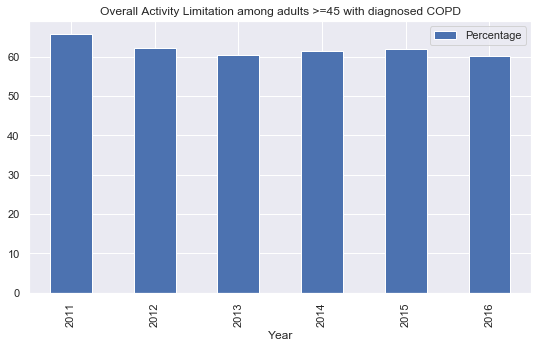

In [154]:
dfQ6O.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title('Overall Activity Limitation among adults >=45 with diagnosed COPD')

In [155]:
# Overall incidence of Activity Limitation among adults >=45 in New York
dfQ6NYO = df1a6[(df1a6['Category']=='Overall') & (df1a6['Location'] == 'NY')]
dfQ6NYO.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
116261,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Overall,Overall,2011,63.9,%,NY
117095,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Overall,Overall,2012,64.5,%,NY
117428,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Overall,Overall,2016,61.5,%,NY
117492,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Overall,Overall,2014,58.0,%,NY
117555,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Overall,Overall,2013,55.7,%,NY


(<matplotlib.axes._subplots.AxesSubplot at 0x12a53290>,
 Text(0.5, 1.0, 'Overall Activity Limitation among adults >=45 with diagnosed COPD in New York'))

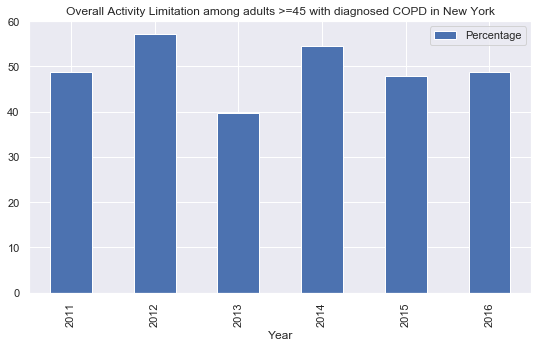

In [156]:
dfQ5NYO.groupby('Year').mean().plot(kind='bar',figsize=(9,5)),plt.title('Overall Activity Limitation among adults >=45 with diagnosed COPD in New York')


In [157]:
# Incidence of Activity limitation in Adults >=45 by Race/Ethnicity
# 
dfQ6RE = df1a6[df1a6['Category']== 'Race/Ethnicity']
dfQ6RE.head()

,Source,ValueType,Question,Category,Subcategory,Year,Percentage,DataValueUnit,Location
79913,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Race/Ethnicity,"White, non-Hispanic",2011,55.3,%,AK
80005,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Race/Ethnicity,"White, non-Hispanic",2014,68.6,%,AK
80049,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Race/Ethnicity,"White, non-Hispanic",2012,61.7,%,AK
80140,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Race/Ethnicity,"White, non-Hispanic",2016,68.3,%,AK
80340,BRFSS,Age-adjusted Prevalence,Prevalence of activity limitation among adults...,Race/Ethnicity,"White, non-Hispanic",2013,69.8,%,AK


In [158]:
dfQ6RE.groupby(['Subcategory','Year']).describe().round(2)

Percentage                                    \
                                    count   mean    std   min    25%    50%   
Subcategory               Year                                                
Black, non-Hispanic       2011       18.0  65.19   8.68  51.3  58.82  64.70   
                          2012       17.0  63.14   8.19  46.9  59.80  62.10   
                          2013       21.0  58.00  11.72  35.3  56.00  57.80   
                          2014       18.0  57.69  11.30  35.9  48.98  58.25   
                          2015       20.0  57.84  10.25  35.5  50.27  60.05   
                          2016       11.0  50.06  10.56  33.4  44.85  49.00   
Hispanic                  2011        7.0  64.19  12.13  54.9  57.20  59.60   
                          2012        7.0  57.57  11.08  36.4  54.90  57.30   
                          2013        8.0  58.86  14.38  38.1  51.52  53.50   
                          2014        8.0  54.15   6.34  43.4  51.38  53.90   
                          2015        7.0  54.71   6.21  47.2  50.40  53.20   
                          2016        3.0  59.47   5.09  53.6  57.85  62.10   
Multiracial, non-Hispanic 2011        2.0  77.25  12.37  68.5  72.88  77.25   
                          2012        2.0  64.80  34.79  40.2  52.50  64.80   
                          2013        3.0  68.13  13.98  55.1  60.75  66.40   
                          2014        3.0  67.30  14.84  51.9  60.20  68.50   
                          2015        3.0  73.90  16.94  54.6  67.70  80.80   
                          2016        2.0  79.25  17.04  67.2  73.23  79.25   
Other, non-Hispanic       2011        4.0  61.38  20.72  36.4  49.52  62.55   
                          2012        3.0  66.67  18.03  46.9  58.90  70.90   
                          2013        5.0  64.32  14.79  45.1  58.60  59.40   
                          2014        4.0  61.92  14.77  40.1  59.60  67.65   
                          2015        3.0  51.80  14.21  36.4  45.50  54.60   
                          2016        2.0  63.30  38.61  36.0  49.65  63.30   
White, non-Hispanic       2011       51.0  66.01   5.68  47.7  62.60  67.90   
                          2012       51.0  62.48   5.21  47.0  59.10  63.40   
                          2013       51.0  61.08   5.49  48.5  57.60  61.70   
                          2014       50.0  62.57   6.26  45.0  59.30  64.05   
                          2015       51.0  62.21   6.20  44.4  59.30  62.50   
                          2016       19.0  61.45   4.94  47.1  59.05  61.60   

                                             
                                  75%   max  
Subcategory               Year               
Black, non-Hispanic       2011  67.95  80.9  
                          2012  71.00  76.5  
                          2013  63.00  79.5  
                          2014  65.85  76.2  
                          2015  63.82  73.5  
                          2016  55.40  71.1  
Hispanic                  2011  65.40  89.6  
                          2012  64.40  70.7  
                          2013  69.32  80.8  
                          2014  57.30  62.9  
                          2015  58.80  64.2  
                          2016  62.40  62.7  
Multiracial, non-Hispanic 2011  81.62  86.0  
                          2012  77.10  89.4  
                          2013  74.65  82.9  
                          2014  75.00  81.5  
                          2015  83.55  86.3  
                          2016  85.28  91.3  
Other, non-Hispanic       2011  74.40  84.0  
                          2012  76.55  82.2  
                          2013  78.10  80.4  
                          2014  69.98  72.3  
                          2015  59.50  64.4  
                          2016  76.95  90.6  
White, non-Hispanic       2011  70.10  75.2  
                          2012  65.60  76.1  
                          2013  64.90  70.9  
                          2014  66.53  72.9

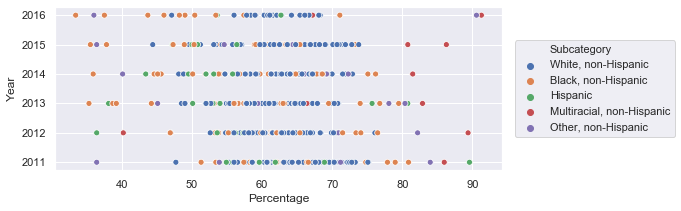

In [159]:
# The multiracial, non-Hispanic group has a much higher incidence of activity limitation;
# Hispanics have the lowest incidence for adults >=45 with diagnosed COPD
# 
sns.set(rc={'figure.figsize':(8,3)})
g = sns.scatterplot(data=dfQ6RE,x="Percentage",y="Year",hue="Subcategory")
g.legend(loc='right',bbox_to_anchor=(1.40,0.5),ncol=1)
plt.show()

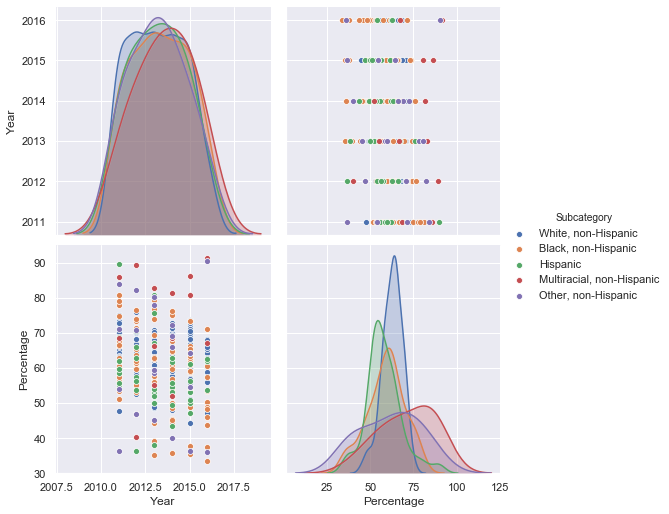

In [160]:
sns.pairplot(dfQ6RE,hue="Subcategory",height=3.5)